<a href="https://colab.research.google.com/github/kevinhaposan/Churn-for-Bank-Customer-Modelling/blob/main/Customer_Churn_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn Prediction**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.stats.proportion as sp

import matplotlib.pyplot as plt
import seaborn as sns
import math

# **Import Dataset**

In [ ]:
url = 'https://drive.google.com/uc?id=1X2MCkz5GW7fVE00_vk6AzoYMMSqXkDY9'
df1 = pd.read_csv(url)
df1

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

# **Exploratory Data Analysis (EDA)**

## **Descriptive Statistics**

### **A. Data Type Mismatch**

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There is a data type inconsistency, where 'Exited' should be of string data type because it is string.

In [ ]:
# Changing Data Type
df1['Exited'] = df1['Exited'].astype('str')

# Changing data types of NumOfProducts, IsActiveMember, and HasCrCard to categorical for descriptive purposes only
df1['NumOfProducts'] = df1['NumOfProducts'].astype('str')
df1['IsActiveMember'] = df1['IsActiveMember'].astype('str')
df1['HasCrCard'] = df1['HasCrCard'].astype('str')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  object 
 10  HasCrCard        10000 non-null  object 
 11  IsActiveMember   10000 non-null  object 
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.1+ MB


Pergantian tipe data Exited sudah berhasil dilakukan.

### **B. Data Kosong**

In [ ]:
print(f"Total duplicated data = ", df1.duplicated().sum())
print(f"Total duplicated data in subset 'RowNumber' = ", df1.duplicated(subset=['RowNumber']).sum())
print(f"Total duplicated data in subset 'CustomerId' = ", df1.duplicated(subset=['CustomerId']).sum())

Total duplicated data =  0
Total duplicated data in subset 'RowNumber' =  0
Total duplicated data in subset 'CustomerId' =  0


In [ ]:
# Drop columns RowNumber, CustomerID, and Surname as these columns will not be used
df1 = df1.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

### **C. Nilai Summary**

In [ ]:
# Splitting each column into numeric and categorical
nums = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
cats = ['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember', 'HasCrCard','Exited']

In [ ]:
# Summary of numeric column values
df1[nums].describe()

CreditScore           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000

In [ ]:
# Summary of categorical column values
df1[cats].describe()

Geography Gender NumOfProducts IsActiveMember HasCrCard Exited
count      10000  10000         10000          10000     10000  10000
unique         3      2             4              2         2      2
top       France   Male             1              1         1      0
freq        5014   5457          5084           5151      7055   7963

- The summary analysis of numeric data shows no anomalies, as evidenced by the close proximity of the Mean and Median values.
- In categorical data, each unique value in each column is consistent (indicating low diversity).
- The frequency of each categorical column is consistent, and there are no significant imbalances.

## **Univariate Analysis**

### **A. Numerical Univariate Statistics**

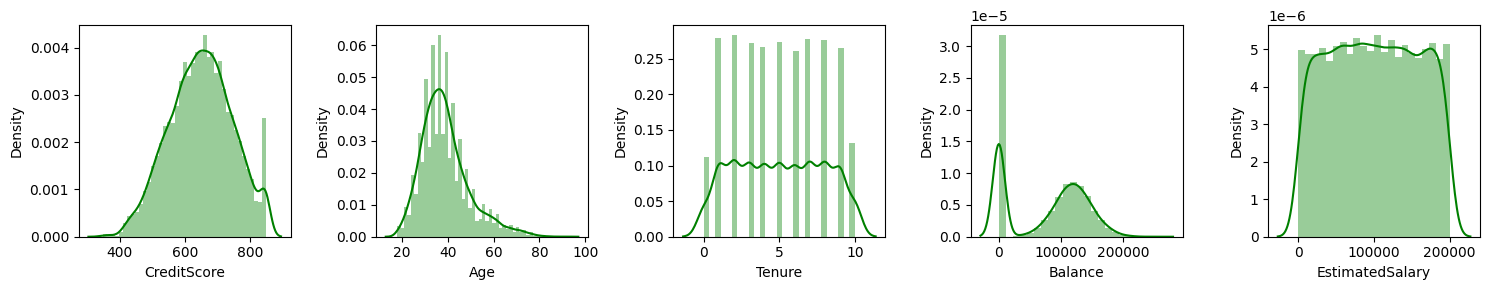

In [ ]:
# Individual distribution plot - numeric
plt.figure(figsize=(15, 3))
for i in range(0, len(nums)):
    plt.subplot(1, 5, i+1)
    sns.distplot(x=df1[nums[i]], color='green')
    plt.xlabel(nums[i])
    plt.tight_layout()

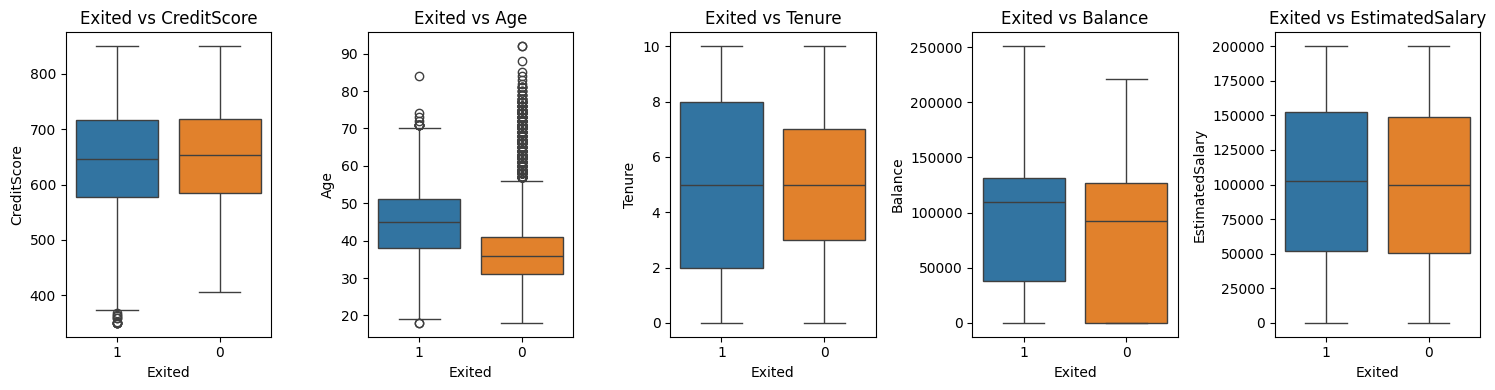

In [ ]:
# Boxplot of numeric features - target
plt.figure(figsize=(15, 4))
for i, feature in enumerate(nums, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df1, x='Exited', y=feature, palette='tab10')
    plt.title(f'Exited vs {feature}')
plt.tight_layout()
plt.show()

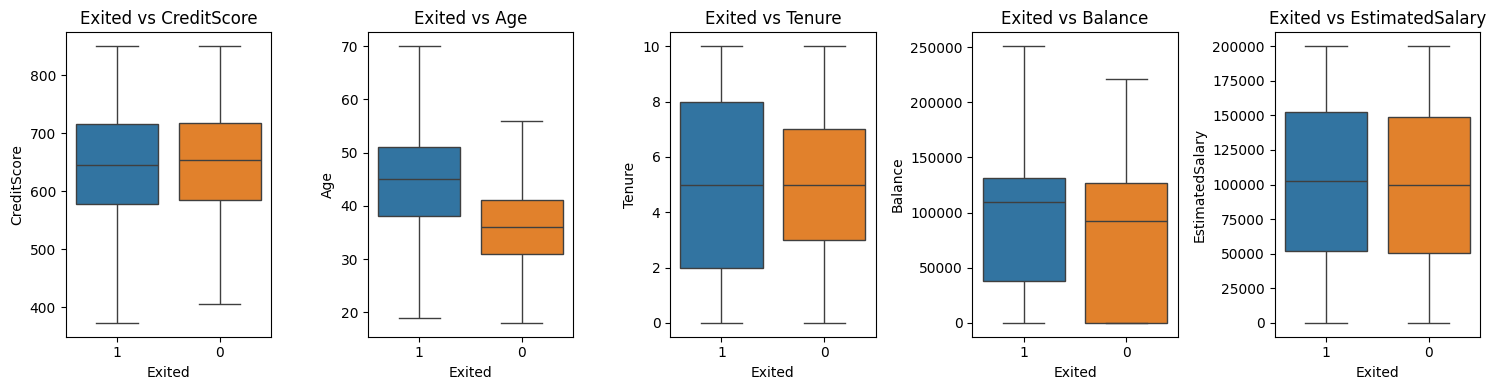

In [ ]:
# Boxplot of numeric features - target (excluding outliers)
plt.figure(figsize=(15, 4))
for i, feature in enumerate(nums, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=df1, x='Exited', y=feature, showfliers= False, palette='tab10')
    plt.title(f'Exited vs {feature}')
plt.tight_layout()
plt.show()

### **B. Categorical Statistics**

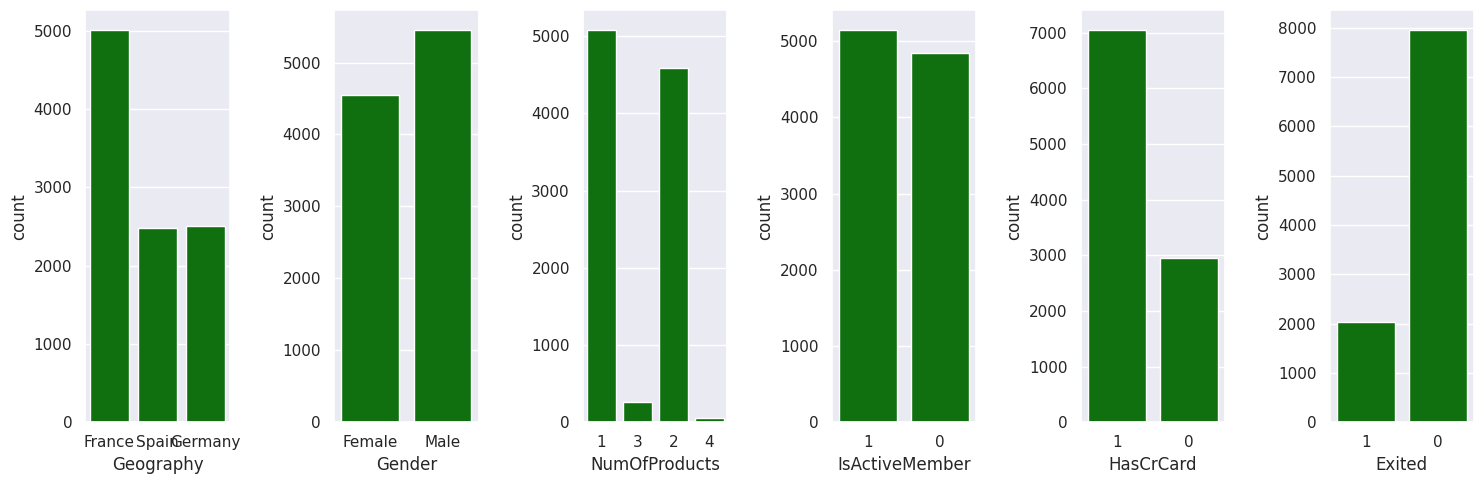

In [ ]:
features = cats
sns.set(rc={'figure.figsize':(15,5)})
for i in range (0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.countplot(x=df1[features[i]], color='green')
    plt.tight_layout()

**A. Based on the analysis using Numerical - Univariate Statistics, it was found that:**<br>
1. Credit Score shows Normal distribution (No Skew), Age shows Positively Skewed, and Balance shows Bimodal distribution.
2. The dominant values for CreditScore are in the range of 600-700, while for Balance, the frequencies are high around 0 and in the range of 100,000-150,000.
3. Age and CreditScore are considered to have no outliers because their values do not differ significantly within the data.<br>
**B. Based on the analysis using Categorical - Univariate Statistics, it was found that:**
1. The dominant values for Geography are France, for Gender are Male, for InActiveMember & HasCrCard are 'Yes' (1), and for Exited are Non-Churn customers (0).
2. There are not too many categories for each feature.<br>
**C. The follow-up actions during data processing should include:**<br>
Filtering out outlier data, Performing feature transformation such as normalization or standardization, Creating feature encoding for model building, and Handling class imbalance.

## **Multivariate Analysis**

<Axes: >

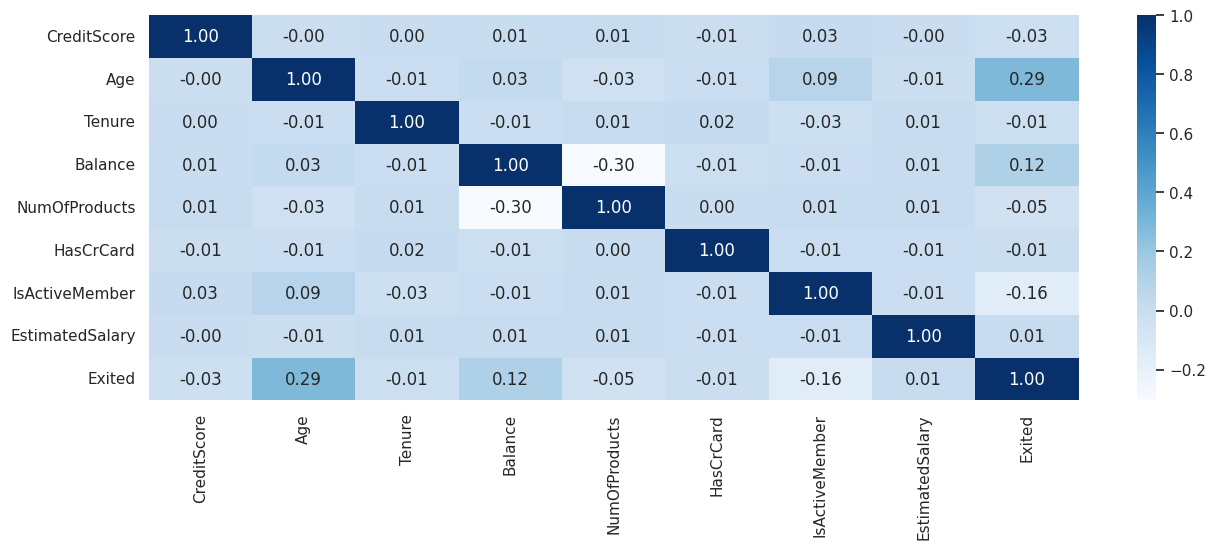

In [ ]:
url = 'https://drive.google.com/uc?id=1X2MCkz5GW7fVE00_vk6AzoYMMSqXkDY9'
df_new = pd.read_csv(url)

df_new = df_new.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Heatmap
numeric_df = df_new.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=True, fmt='.2f')

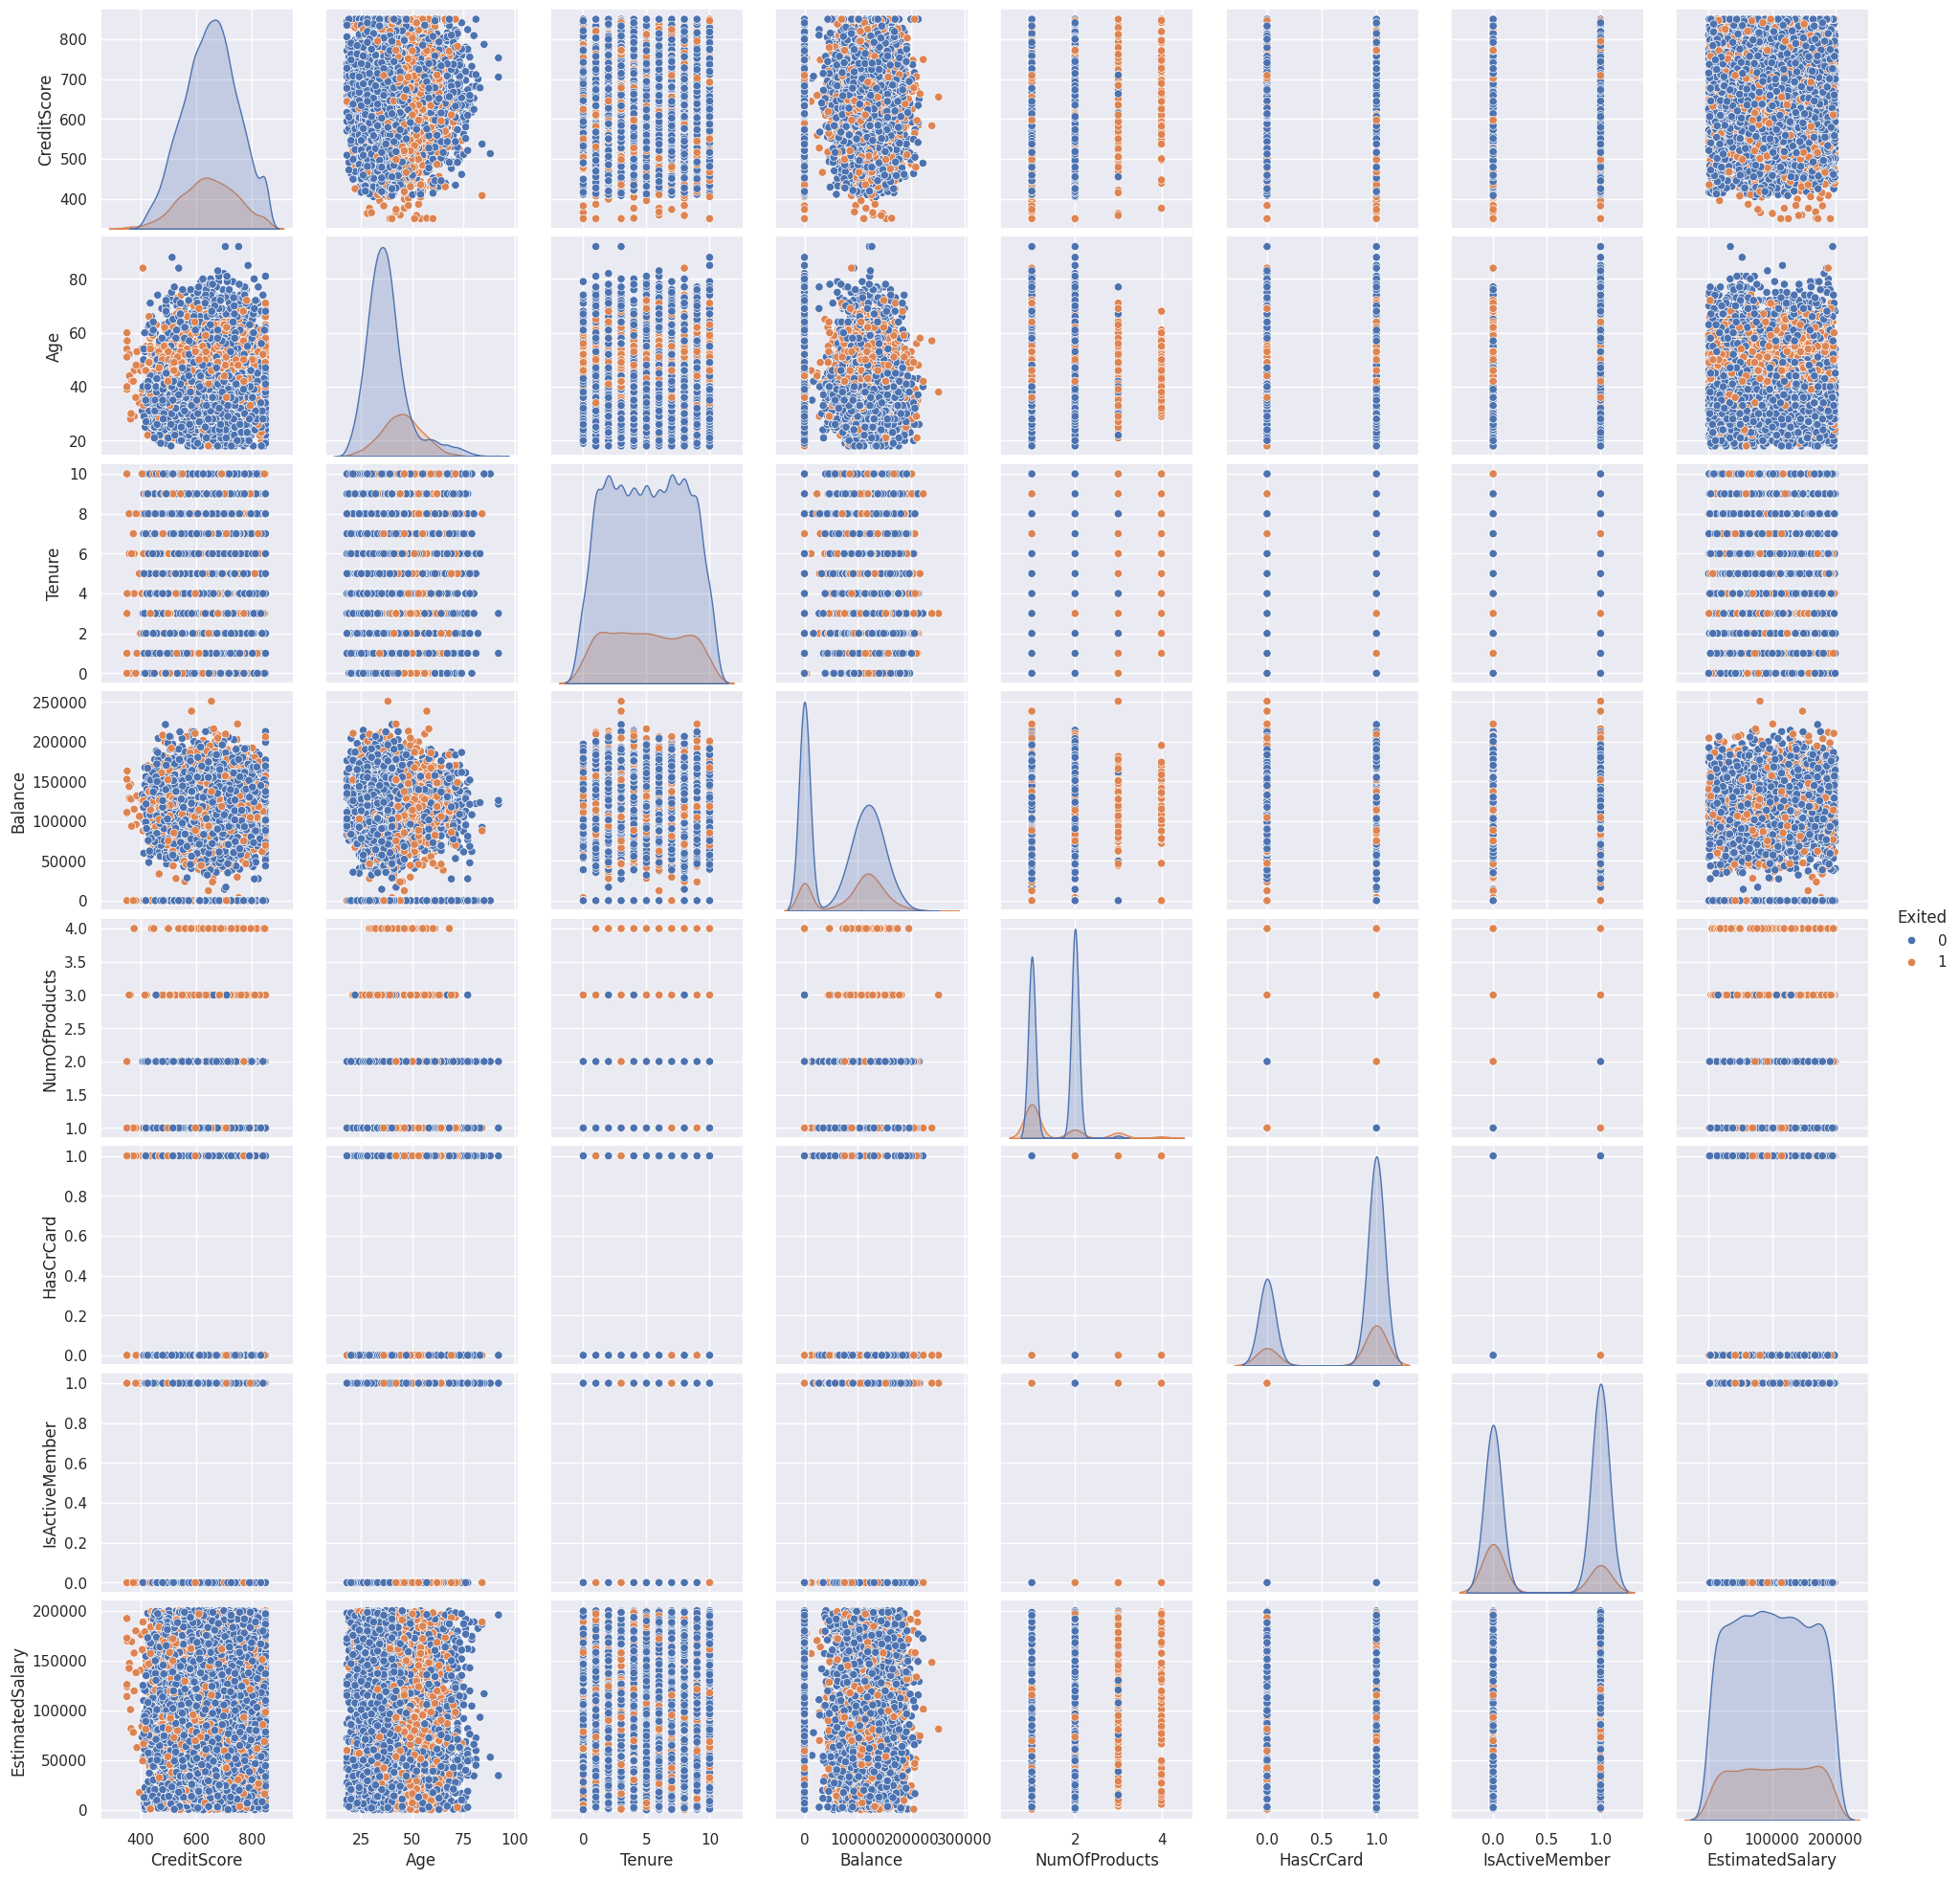

In [ ]:
# KDE plot
sns.pairplot(df_new, diag_kind='kde', hue='Exited')

## **Business Insight**

In [ ]:
# Dividing into 4 segments for the Age column
list_segment_Age = []
for i, row in df1.iterrows(): # iterating over each row of the dataframe
    if row['Age'] < 30:
        Segment = 'Young'
    elif row['Age'] >= 30 and row['Age'] < 40:
        Segment = 'Middle'
    elif row['Age'] >= 40 and row['Age'] < 50:
        Segment = 'Senior'
    else:
        Segment = 'Elderly'
    list_segment_Age.append(Segment) # adding each row's item to the empty list

df1['SegmentAge'] = list_segment_Age

In [ ]:
df1.head()

CreditScore Geography  Gender  Age  Tenure    Balance NumOfProducts  \
0          619    France  Female   42       2       0.00             1   
1          608     Spain  Female   41       1   83807.86             1   
2          502    France  Female   42       8  159660.80             3   
3          699    France  Female   39       1       0.00             2   
4          850     Spain  Female   43       2  125510.82             1   

  HasCrCard IsActiveMember  EstimatedSalary Exited SegmentAge  
0         1              1        101348.88      1     Senior  
1         0              1        112542.58      0     Senior  
2         1              0        113931.57      1     Senior  
3         0              0         93826.63      0     Middle  
4         1              1         79084.10      0     Senior

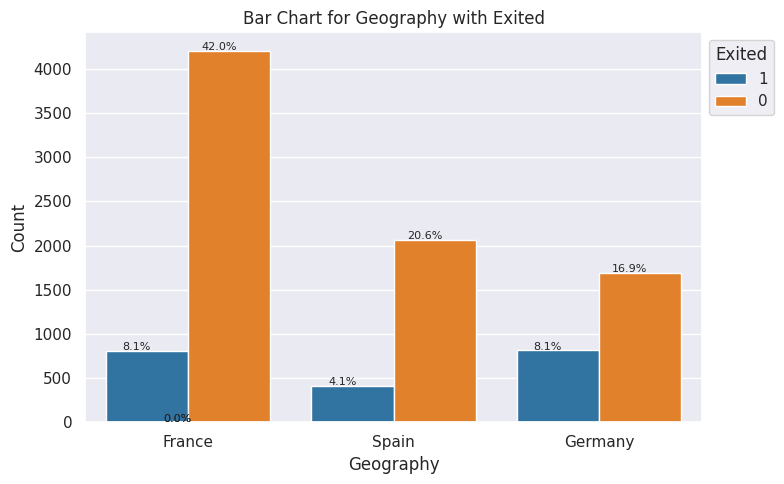

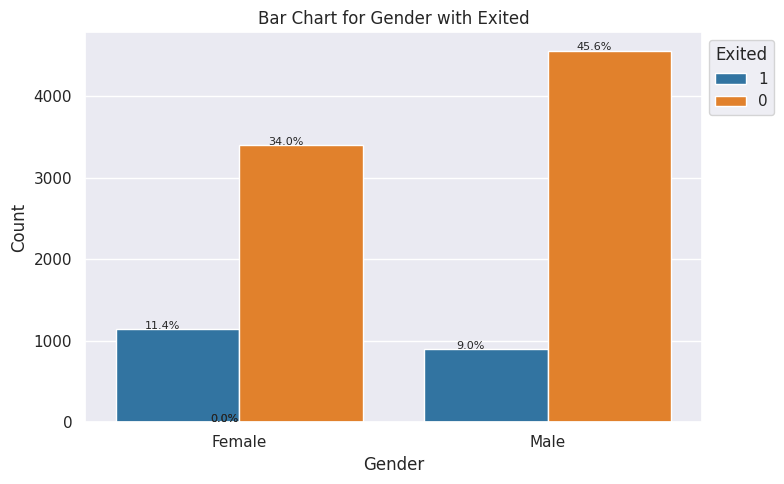

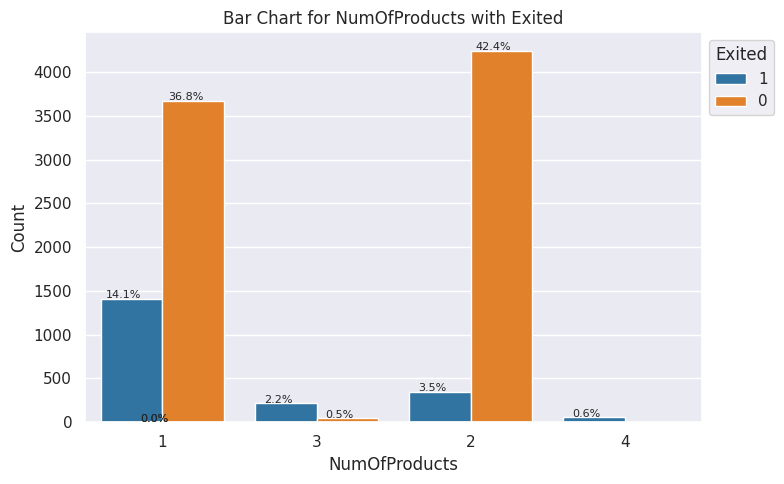

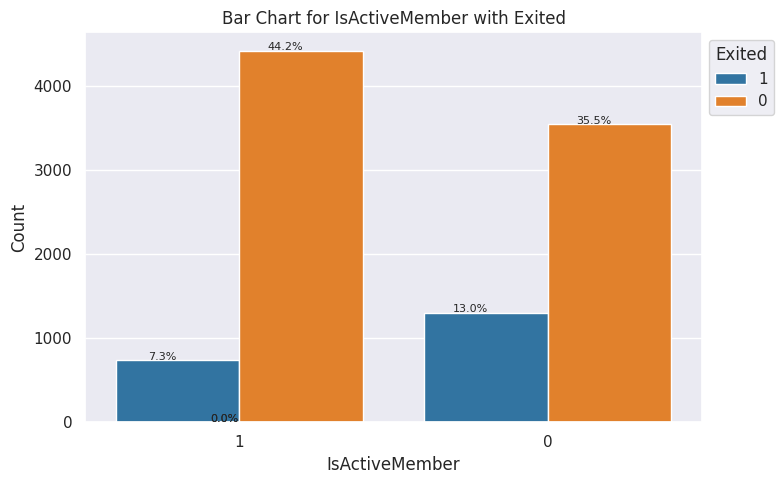

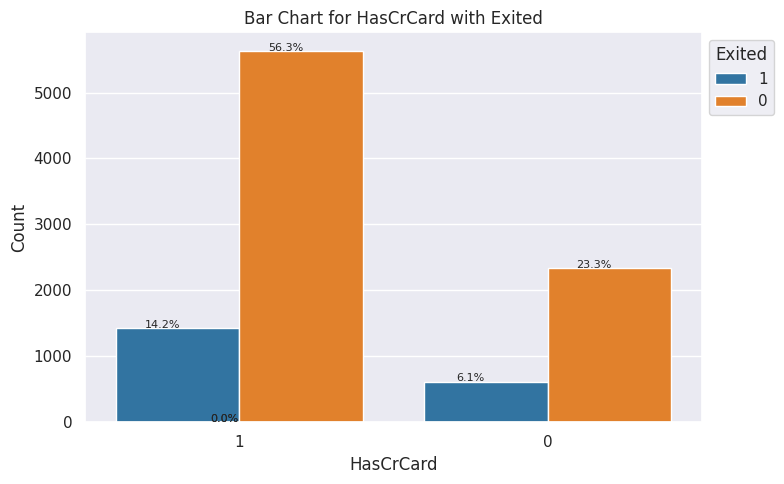

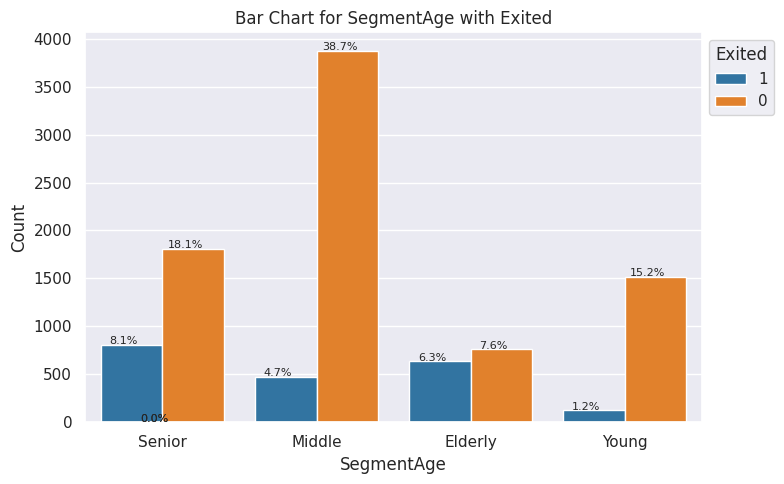

In [ ]:
# Iterating to create bar charts and display percentages

cats_1 = ['Geography', 'Gender', 'NumOfProducts', 'IsActiveMember', 'HasCrCard', 'SegmentAge']

for cat in cats_1:
    if cat != 'Exited':  # Exclude the 'Exited' column
        plt.figure(figsize=(8, 5))
        ax = sns.countplot(data=df1, x=cat, hue='Exited', palette='tab10')
        plt.title(f'Bar Chart for {cat} with Exited')
        plt.xlabel(cat)
        plt.ylabel('Count')

        # Adding percentage above each bar
        total = len(df1[cat])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_height() + 5
            ax.annotate(percentage, (x, y), ha='center', fontsize=8)

        # Placing the legend outside the plot area
        plt.legend(title='Exited', loc='upper left', bbox_to_anchor=(1, 1))

        plt.tight_layout()  # Ensure good layout
        plt.show()

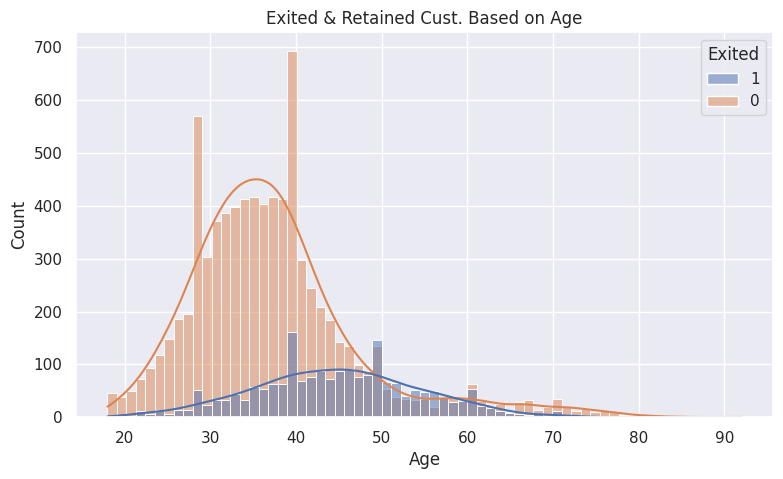

In [ ]:
# Distribution of Exited & Retained Customers based on Age
fig, ax = plt.subplots(figsize=(9,5))

ax.set_title('Exited & Retained Cust. Based on Age')
sns.histplot(x='Age', hue='Exited', data=df1, kde=True, ax=ax)

plt.show()

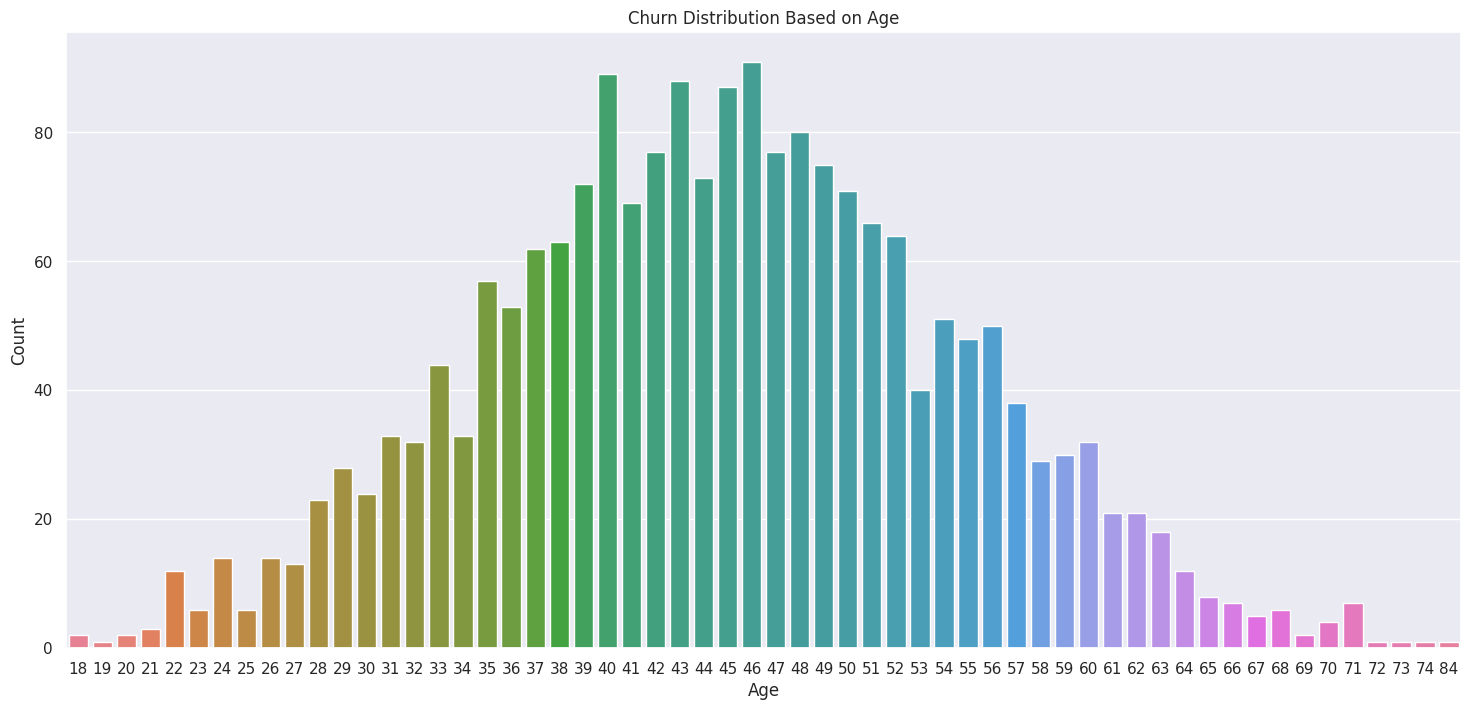

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe
df_age = df_new.groupby(['Age', 'Exited'])['Balance'].count().reset_index()
df_age = df_age[df_age['Exited']==1].reset_index()
df_age.head(10)

# Plot
plt.figure(figsize=(18, 8))
sns.barplot(x='Age', y='Balance', data=df_age, palette='husl')
plt.title('Churn Distribution Based on Age')
plt.xlabel('Age')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

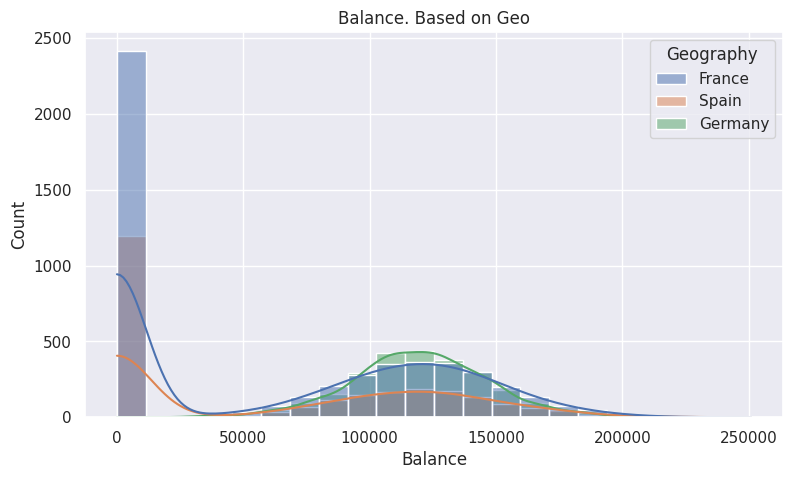

In [ ]:
# Distribution of Balance based on Geography
fig, ax = plt.subplots(figsize=(9,5))

ax.set_title('Balance. Based on Geo')
sns.histplot(x = 'Balance', hue='Geography', data = df1, kde = True, ax=ax)

plt.show()

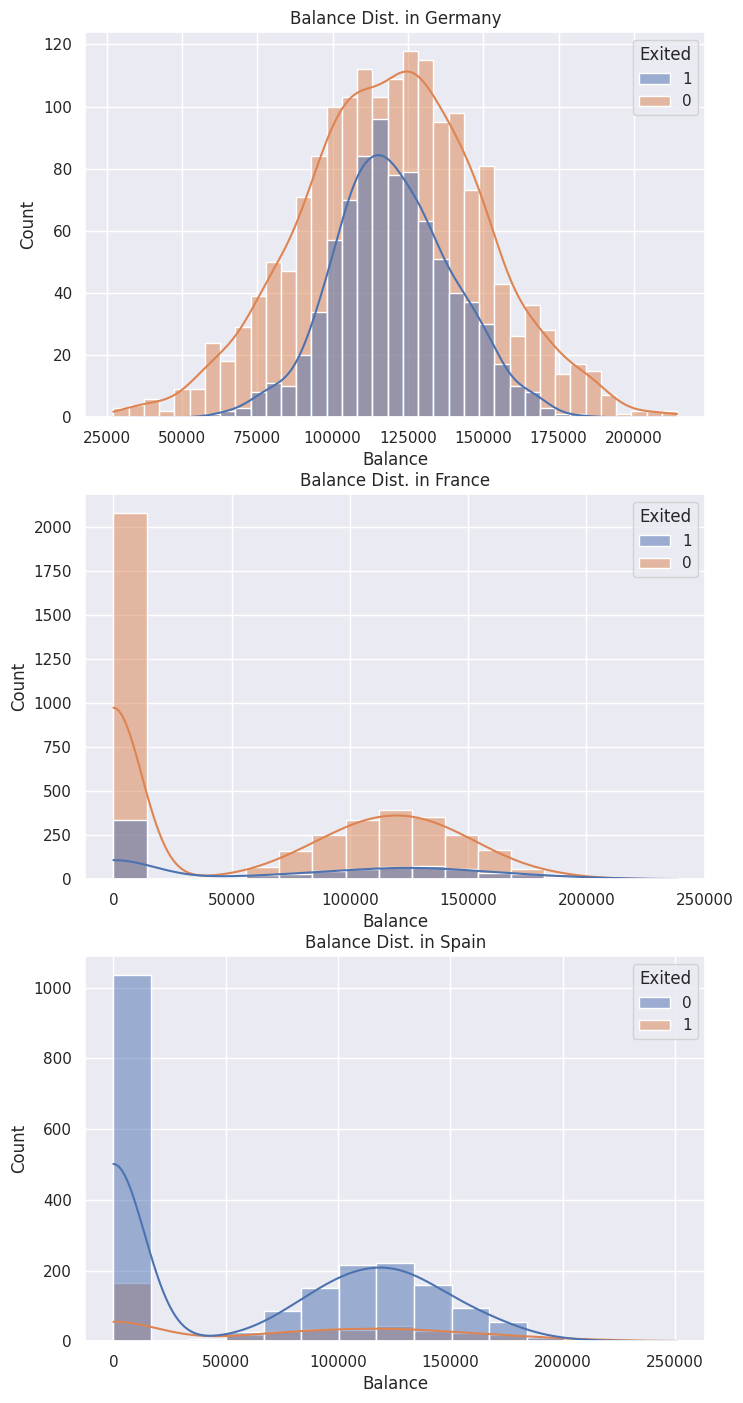

In [ ]:
# Distribution of Balance in each Geography
fig, ax = plt.subplots(3,1, figsize=(8,17))

# Ploting data on chart
sns.histplot(x = 'Balance', hue='Exited',data = df1[df1['Geography']=='Germany'], kde = True, ax=ax[0])
sns.histplot(x = 'Balance', hue='Exited',data = df1[df1['Geography']=='France'], kde = True, ax=ax[1])
sns.histplot(x = 'Balance', hue='Exited',data = df1[df1['Geography']=='Spain'], kde = True, ax=ax[2])


# Set title
ax[0].set_title('Balance Dist. in Germany')
ax[1].set_title('Balance Dist. in France')
ax[2].set_title('Balance Dist. in Spain')


# Displaying the chart
plt.show()

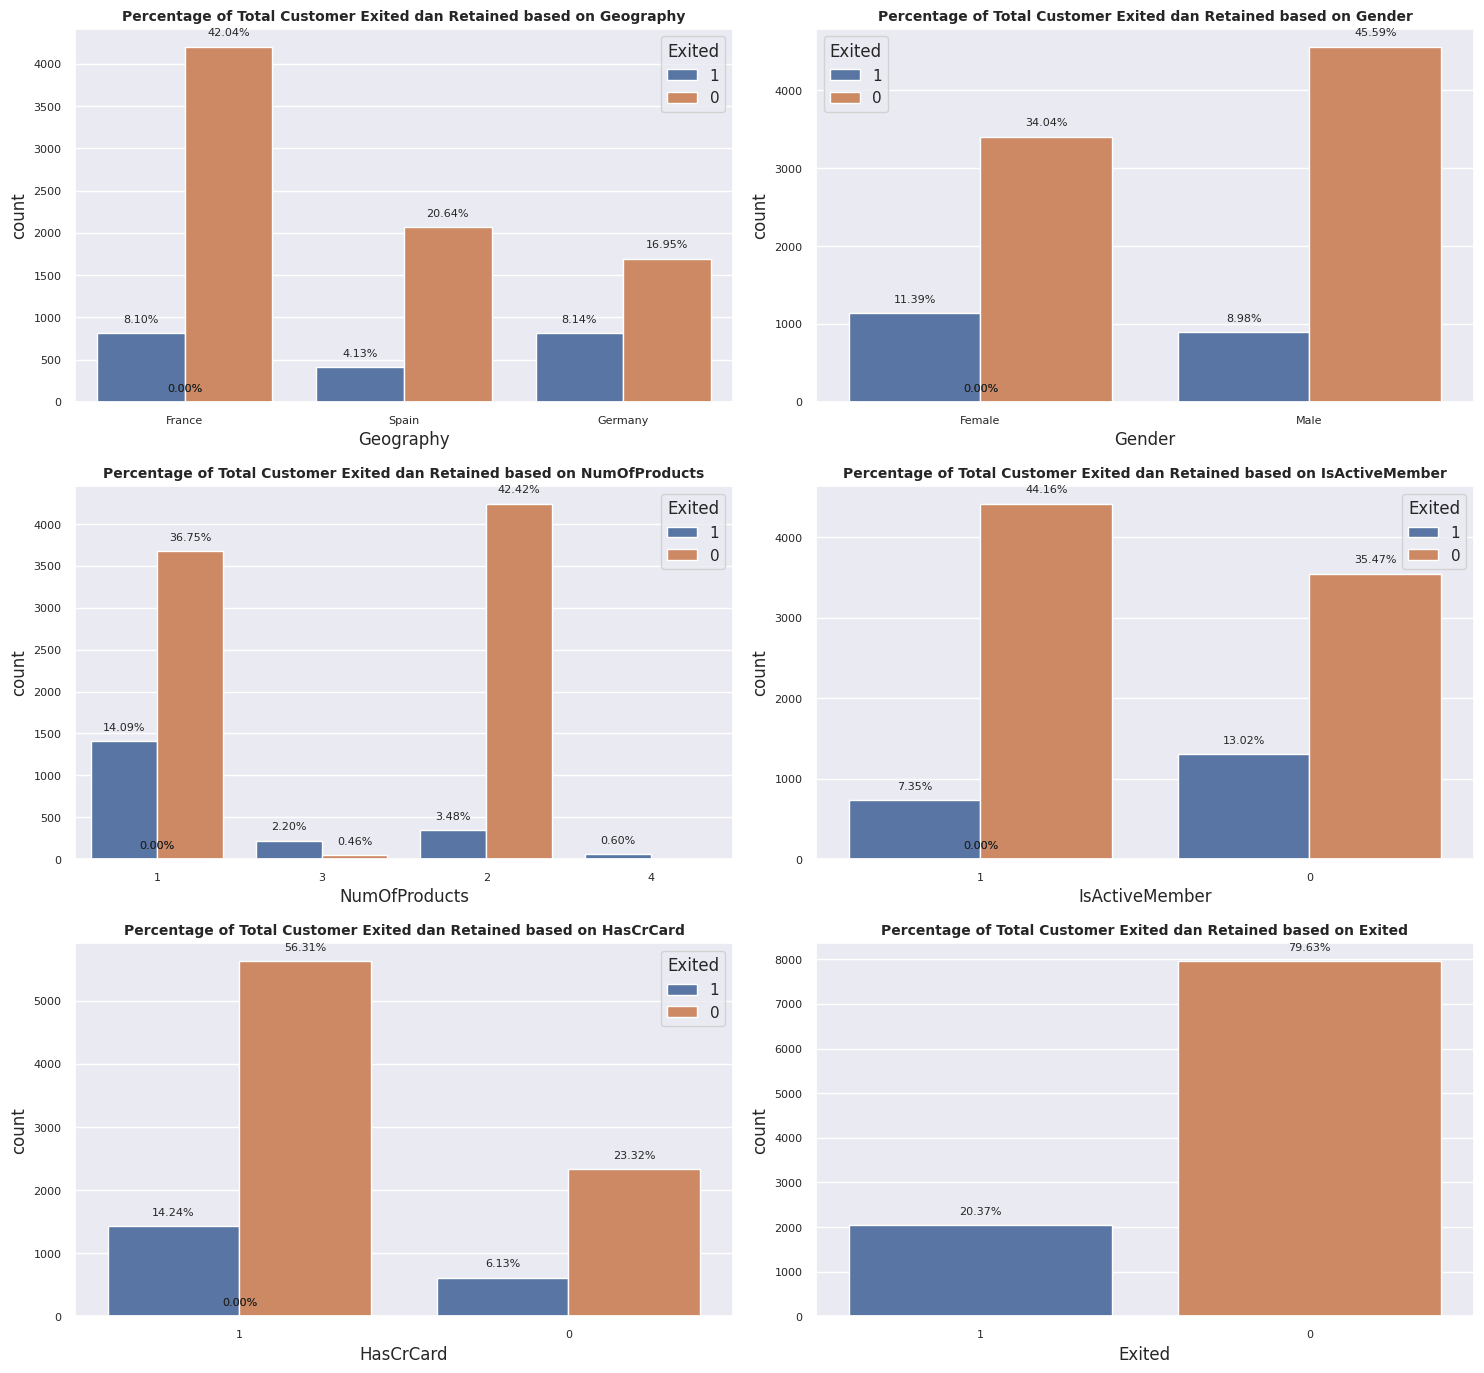

In [ ]:
# Viewing the percentage of Churned and Retained customers based on existing features.
plt.figure(figsize=(15,18))

for i in range (len(cats)):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(data=df1, x=cats[i], hue="Exited", palette="deep")
    total_data = len(df1[df1[cats[i]].notnull()])
    for p in ax.patches:
        percentage = 100 * p.get_height() / total_data
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', size = 8)

    plt.title(f"Percentage of Total Customer Exited dan Retained based on {cats[i]}", size=10, fontweight = 'bold')
    plt.tick_params(axis='x', labelsize=8)
    plt.tick_params(axis='y', labelsize=8)
    plt.tight_layout()

**Business Insight:**
1. Age
The majority of customers are Middle-aged, followed by Young and Senior customers. Interestingly, Senior customers exhibit the highest churn rate.

2. NumOfProducts
Most customers have 1 NumOfProducts, while the least common is 4. Customers with 1 NumOfProduct show the highest churn rate.

3. IsActiveMember
Inactive customers are more prone to churn compared to active members.

4. Geography
- Based on geographical segmentation, Germany and France have higher churn rates compared to Spain, which is only 4.13%.
- Further evaluation is needed for German customers as despite having fewer total customers compared to France, Germany exhibits a higher churn rate.

5. Gender
- Female customers have a higher churn percentage compared to male customers, at 11.39%.

6. Balance
- Looking at the dominant values, balances mostly occur at 0 and in the range of 100,000 - 150,000.
- When examining the distribution of balances per geography, Germany has the highest balances in the range of 100,000 - 150,000, while France and Spain have the highest balances at 0.

# **Data Pre-Processing**

Before conducting data pre-processing, it is necessary to copy the previous dataframe so that if there are any errors, we do not have to run everything from the beginning.

In [ ]:
df = df_new.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df['Exited'] = df['Exited'].astype('boolean')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  boolean
dtypes: boolean(1), float64(2), int64(6), object(2)
memory usage: 800.9+ KB


## **Data Cleansing & Feature Engineering**

### **A. Handle Missing Value**

The copying of the previous dataframe has been done during the Exploratory Data Analysis (EDA) phase.

### **B. Handle Duplicated Data**

The copying of the previous dataframe has been done during the Exploratory Data Analysis (EDA) phase.

### **C. Label Encoding**

In [ ]:
cat1 = ['Gender', 'Geography']

# Doing one-hot encoding on categorical columns
for cat in cat1:
    if df[cat].dtype == 'object':
        nominal_encoded = pd.get_dummies(df[cat], prefix=cat, dtype=int)
        df = pd.concat([df, nominal_encoded], axis=1)

# Deleting the categorical columns that have been encoded
df.drop(columns=cat1, inplace=True)

In [ ]:
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Gender_Female  Gender_Male  \
0               1        101348.88    True              1            0   
1               1        112542.58   False              1            0   
2               0        113931.57    True              1            0   
3               0         93826.63   False              1            0   
4               1         79084.10   False              1            0   

   Geography_France  Geography_Germany  Geography_Spain  
0                 1                  0                0  
1                 0                  0                1  
2                 1                  0                0  
3                 1                  0                0  
4                 0                  0                1

Label Encoding using the One Hot Encoding method has been successfully performed.

### **D. Feature Extraction**

Feature transformation is done first because some columns will undergo transformation, resulting in different numerical values compared to some references.



In [ ]:
# Dividing into 4 segments for the Age column
list_segment_Age = []
for i, kolom in df.iterrows(): # Doing iteration on each row of the dataframe.
    if kolom['Age'] < 30:
        Segment = 1
    elif kolom['Age'] >= 30 and kolom['Age'] < 40:
        Segment = 2
    elif kolom['Age'] >= 40 and kolom['Age'] < 50:
        Segment = 3
    else:
        Segment = 4
    list_segment_Age.append(Segment) # Adding an empty list of items for each row

df['AgeSegment'] = list_segment_Age

In [ ]:
# Dividing into 5 segments for the CreditScore column
list_segment_CreditScore = []
for i, kolom in df.iterrows():
    if kolom['CreditScore'] < 580:
        Segment = '1'
    elif kolom['CreditScore'] >= 580 and kolom['CreditScore'] < 669:
        Segment = '2'
    elif kolom['CreditScore'] >= 669 and kolom['CreditScore'] < 739:
        Segment = '3'
    elif kolom['CreditScore'] >= 739 and kolom['CreditScore'] < 799:
        Segment = '4'
    else:
        Segment = '5'
    list_segment_CreditScore.append(Segment)

df['CreditScoreSegment'] = list_segment_CreditScore

In [ ]:
# Dividing into 5 segments for the Balance column
list_segment_Balance = []
for i, kolom in df.iterrows(): #melakukan iterasi pada setiap baris dataframe
    if kolom['Balance'] < 50000:
        Segment = '1'
    elif kolom['Balance'] >= 50000 and kolom['Balance'] < 100000:
        Segment = '2'
    elif kolom['Balance'] >= 100000 and kolom['Balance'] < 150000:
        Segment = '3'
    else:
        Segment = '4'
    list_segment_Balance.append(Segment) #menambahkan list kosong dari item tiap row

df['BalanceSegment'] = list_segment_Balance

In [ ]:
# Dividing into 5 segments for the EstimatedSalary column
list_segment_EstimatedSalary = []
for i, kolom in df.iterrows(): #melakukan iterasi pada setiap baris dataframe
    if kolom['EstimatedSalary'] < 50000:
        Segment = '1'
    elif kolom['EstimatedSalary'] >= 50000 and kolom['EstimatedSalary'] < 100000:
        Segment = '2'
    elif kolom['EstimatedSalary'] >= 100000 and kolom['EstimatedSalary'] < 150000:
        Segment = '3'
    else:
        Segment = '4'
    list_segment_EstimatedSalary.append(Segment) #menambahkan list kosong dari item tiap row

df['EstimatedSalarySegment'] = list_segment_EstimatedSalary

In [ ]:
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Gender_Female  Gender_Male  \
0               1        101348.88    True              1            0   
1               1        112542.58   False              1            0   
2               0        113931.57    True              1            0   
3               0         93826.63   False              1            0   
4               1         79084.10   False              1            0   

   Geography_France  Geography_Germany  Geography_Spain  AgeSegment  \
0                 1                  0                0           3   
1                 0                  0                1           3   
2                 1                  0                0           3   
3                 1                  0                0           2   
4                 0                  0                1           3   

  CreditScoreSegment BalanceSegment EstimatedSalarySegment  
0                  2              1                      3  
1                  2              2                      3  
2                  1              4                      3  
3                  3              1                      2  
4                  5              3                      2

### **E. Data Train, Data Validasi, dan Data Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Exited'],axis=1,inplace=False)
y = df['Exited']

Xmodel, Xtest, ymodel, ytest = train_test_split(X, y, test_size=0.10, random_state=123, stratify = y) #model for building the machine learning model

In [ ]:
ymodel.value_counts()

False    7167
True     1833
Name: Exited, dtype: Int64

In [ ]:
ytest.value_counts()

False    796
True     204
Name: Exited, dtype: Int64

In [ ]:
X1 = Xmodel
y1 = ymodel

Xtrain, Xeval, ytrain, yeval = train_test_split (X1, y1, test_size = 0.2, random_state=123, stratify = y1)

In [ ]:
ytrain.value_counts()

False    5734
True     1466
Name: Exited, dtype: Int64

### **F. Handle Outliers**

Age Column Graph **Before** Handling Outliers (Logarithmic Transformation)

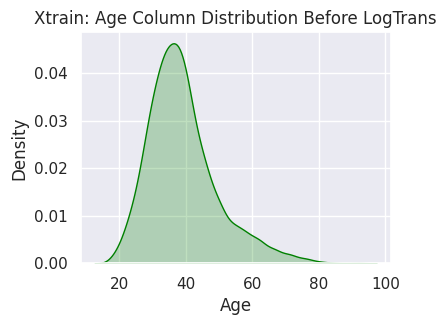

In [ ]:
# The distribution of the Age column in the Xtrain data before performing logarithmic transformation.
plt.figure(figsize=(4, 3))
sns.kdeplot(Xtrain['Age'], shade=True, color='green')
plt.title('Xtrain: Age Column Distribution Before LogTrans')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

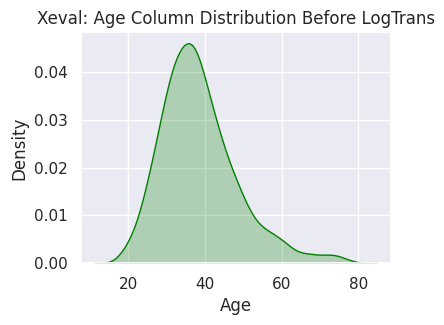

In [ ]:
# The distribution of the Age column in the Xeval data before performing logarithmic transformation.
plt.figure(figsize=(4, 3))
sns.kdeplot(Xeval['Age'], shade=True, color='green')
plt.title('Xeval: Age Column Distribution Before LogTrans')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [ ]:
# Logarithmic transformation of the Age column in the Xtrain and Xeval datasets.
Xtrain['Age'] = (Xtrain['Age']).apply(np.log)
Xeval['Age'] = (Xeval['Age']).apply(np.log)

Age Column Graph **After** Handling Outliers (Logarithmic Transformation)

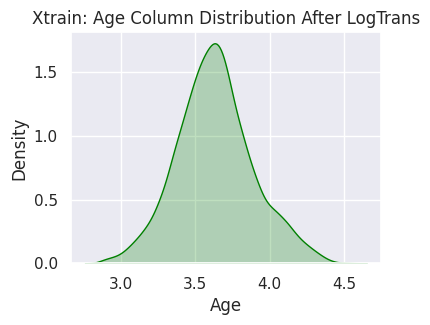

In [ ]:
# The distribution of the Age column in the Xtrain data after performing logarithmic transformation
plt.figure(figsize=(4, 3))
sns.kdeplot(Xtrain['Age'], shade=True, color='green')
plt.title('Xtrain: Age Column Distribution After LogTrans')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

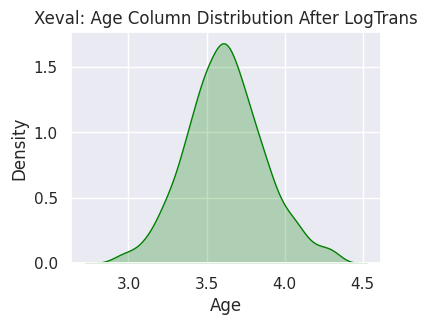

In [ ]:
# The distribution of the Age column in the Xeval data after performing logarithmic transformation
plt.figure(figsize=(4, 3))
sns.kdeplot(Xeval['Age'], shade=True, color='green')
plt.title('Xeval: Age Column Distribution After LogTrans')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

It appears that the logarithmic transformation has been successfully applied. This can be observed from the shift in the positively skewed graph (before transformation) to a normal distribution (after transformation).

### **G. Feature Transformation**

In [ ]:
import math
numerik = ['CreditScore', 'Balance', 'EstimatedSalary']
features = numerik
num_plots = len(features)
num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

Graphs of the CreditScore, Balance, and EstimatedSalary columns **Before** Normalization Transformation.

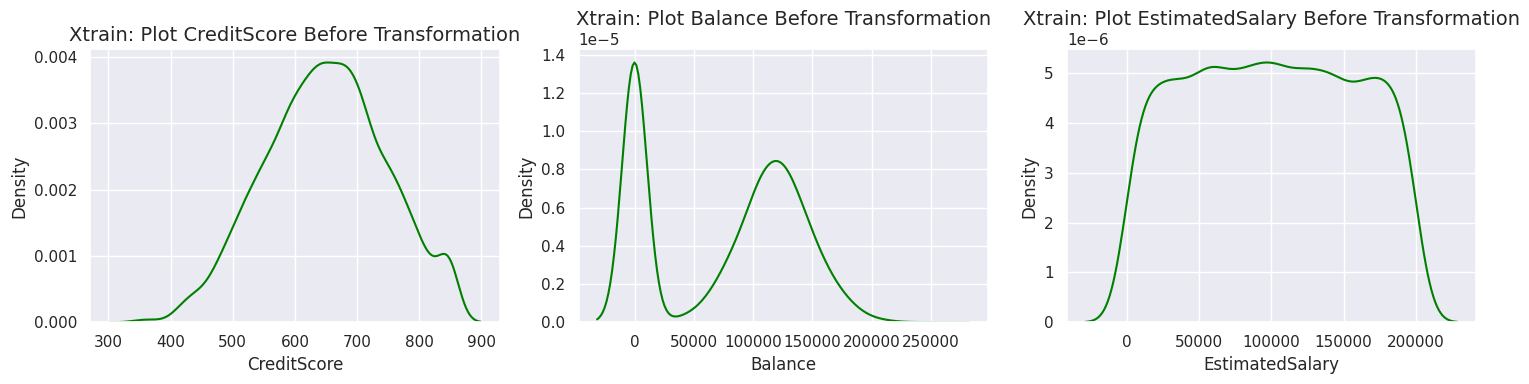

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=Xtrain[features[i]], color='green')
    plt.xlabel(features[i])
    plt.title(f'Xtrain: Plot {features[i]} Before Transformation', size = 14)
plt.tight_layout()
plt.show()

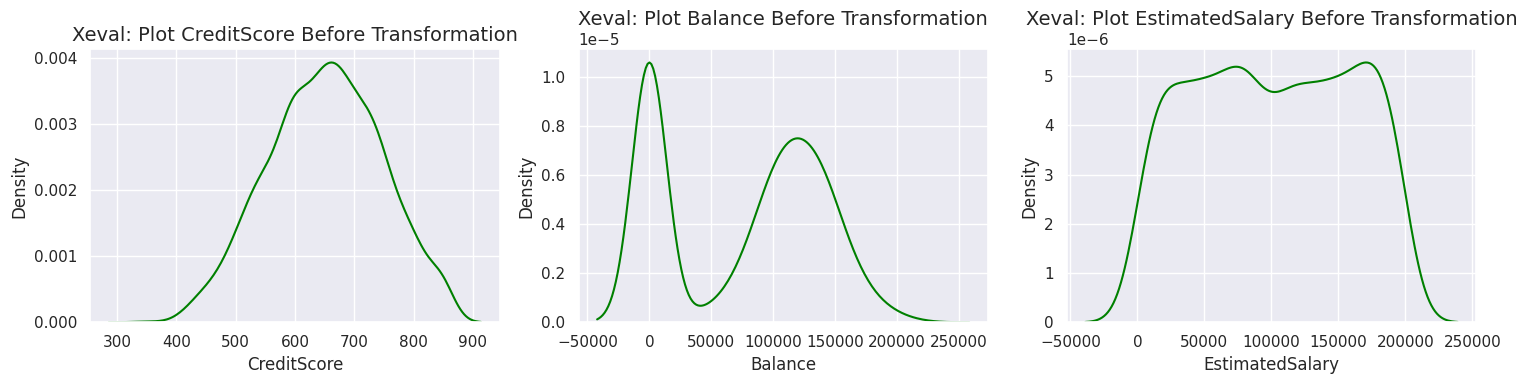

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=Xeval[features[i]], color='green')
    plt.xlabel(features[i])
    plt.title(f'Xeval: Plot {features[i]} Before Transformation', size = 14)
plt.tight_layout()
plt.show()

In [ ]:
# Transforming the columns CreditScore, Balance, and EstimatedSalary features in the Xtrain and Xeval data.
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

for col in numerik:
  Xtrain[[col]] = ms.fit_transform(Xtrain[[col]])
  Xeval[[col]] = ms.transform(Xeval[[col]])

Graphs of the CreditScore, Balance, and EstimatedSalary columns **After** Normalization Transformation.

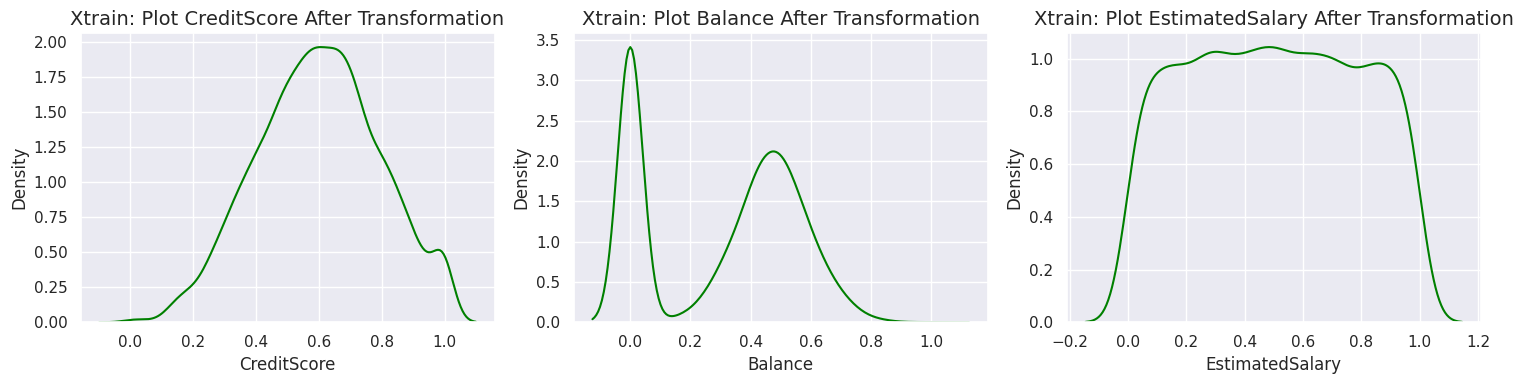

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=Xtrain[features[i]], color='green')
    plt.xlabel(features[i])
    plt.title(f'Xtrain: Plot {features[i]} After Transformation', size = 14)
plt.tight_layout()
plt.show()

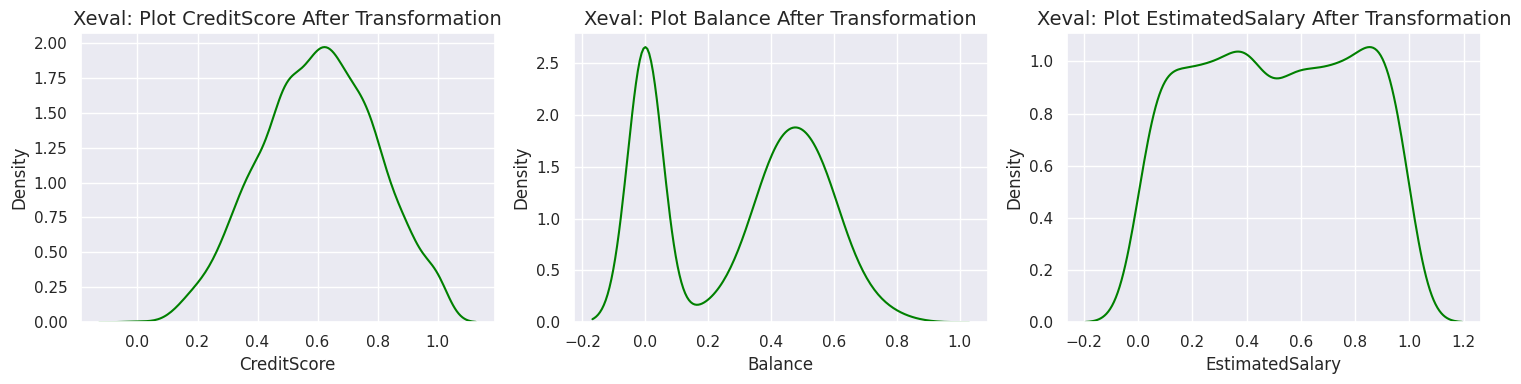

In [ ]:
plt.figure(figsize=(20, 4))
for i in range(num_plots):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(x=Xeval[features[i]], color='green')
    plt.xlabel(features[i])
    plt.title(f'Xeval: Plot {features[i]} After Transformation', size = 14)
plt.tight_layout()
plt.show()

In [ ]:
Xtrain.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
2384        0.764  3.688879      10  0.000000              2          1   
5971        0.910  3.610918       5  0.000000              2          1   
9710        0.386  3.610918       3  0.487467              2          0   
9927        0.928  3.433987       6  0.349833              1          1   
804         1.000  3.663562       4  0.509256              2          0   

      IsActiveMember  EstimatedSalary  Gender_Female  Gender_Male  \
2384               0         0.770961              1            0   
5971               0         0.109597              0            1   
9710               0         0.169952              1            0   
9927               0         0.942614              1            0   
804                1         0.758707              0            1   

      Geography_France  Geography_Germany  Geography_Spain  AgeSegment  \
2384                 1                  0                0           3   
5971                 0                  0                1           2   
9710                 0                  1                0           2   
9927                 1                  0                0           2   
804                  1                  0                0           2   

     CreditScoreSegment BalanceSegment EstimatedSalarySegment  
2384                  3              1                      4  
5971                  5              1                      1  
9710                  1              3                      1  
9927                  5              2                      4  
804                   5              3                      4

In [ ]:
Xeval.head()

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
7818        0.384  3.218876       8  0.555325              1          0   
8024        0.688  3.401197      10  0.576665              1          1   
5507        0.466  3.688879       3  0.216934              1          1   
7316        0.886  3.988984       2  0.514018              1          0   
7006        0.388  3.496508       6  0.000000              2          1   

      IsActiveMember  EstimatedSalary  Gender_Female  Gender_Male  \
7818               0         0.271830              0            1   
8024               1         0.158985              0            1   
5507               0         0.548188              1            0   
7316               0         0.093118              0            1   
7006               1         0.620567              1            0   

      Geography_France  Geography_Germany  Geography_Spain  AgeSegment  \
7818                 0                  1                0           1   
8024                 1                  0                0           2   
5507                 0                  0                1           3   
7316                 0                  1                0           4   
7006                 1                  0                0           2   

     CreditScoreSegment BalanceSegment EstimatedSalarySegment  
7818                  1              3                      2  
8024                  3              3                      1  
5507                  2              2                      3  
7316                  4              3                      1  
7006                  1              1                      3

In [ ]:
print(f"Total of duplicate entries in Xtrain:", Xtrain.duplicated().sum())
print(f"Total of duplicate entries in Xeval:", Xeval.duplicated().sum())

Total of duplicate entries in Xtrain: 0
Total of duplicate entries in Xeval: 0


### **H. Handle Class Imbalance**

In [ ]:
ytrain.value_counts()

False    5734
True     1466
Name: Exited, dtype: Int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=1, random_state=123)
Xtrain_under, ytrain_under = undersample.fit_resample(Xtrain, ytrain)

print('Random Undersampling')
print(pd.Series(ytrain_under).value_counts())

Random Undersampling
False    1466
True     1466
Name: Exited, dtype: Int64


In [ ]:
yeval.value_counts()

False    1433
True      367
Name: Exited, dtype: Int64

### **I. Feature Selection**

**Mutual Information**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(Xtrain_under, ytrain_under,random_state=123)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)

NumOfProducts             0.101292
Age                       0.099978
AgeSegment                0.071689
Geography_Germany         0.033963
Gender_Female             0.029556
Geography_Spain           0.012838
CreditScoreSegment        0.011681
BalanceSegment            0.011263
Balance                   0.007868
EstimatedSalary           0.004194
IsActiveMember            0.003949
EstimatedSalarySegment    0.000513
Geography_France          0.000000
Gender_Male               0.000000
HasCrCard                 0.000000
Tenure                    0.000000
CreditScore               0.000000
Name: MI Scores, dtype: float64


**Chi_square Test**

In [ ]:
from sklearn.feature_selection import chi2

chi2_stats, p_values = chi2(Xtrain_under, ytrain_under)
chi2_stats = pd.Series(chi2_stats, name="Chi2 Scores", index=Xtrain_under.columns)
chi2_stats = chi2_stats.sort_values(ascending=False)
print(chi2_stats)

AgeSegment                134.373340
Geography_Germany          74.286805
IsActiveMember             47.836750
Gender_Female              30.044444
Gender_Male                28.997319
BalanceSegment             27.122298
Geography_France           19.842420
Geography_Spain            14.207101
Balance                    10.858173
Age                         6.182122
Tenure                      3.083002
EstimatedSalarySegment      1.200870
NumOfProducts               1.199415
CreditScoreSegment          0.810325
EstimatedSalary             0.382877
CreditScore                 0.219399
HasCrCard                   0.000489
Name: Chi2 Scores, dtype: float64


In [ ]:
p_values = pd.Series(p_values, name="p_value", index=Xtrain_under.columns)
p_values = p_values.sort_values(ascending=False)
print(p_values)

HasCrCard                 9.823490e-01
CreditScore               6.394980e-01
EstimatedSalary           5.360677e-01
CreditScoreSegment        3.680240e-01
NumOfProducts             2.734387e-01
EstimatedSalarySegment    2.731479e-01
Tenure                    7.911439e-02
Age                       1.290475e-02
Balance                   9.836067e-04
Geography_Spain           1.637514e-04
Geography_France          8.409555e-06
BalanceSegment            1.909823e-07
Gender_Male               7.247854e-08
Gender_Female             4.222565e-08
IsActiveMember            4.632271e-12
Geography_Germany         6.755354e-18
AgeSegment                4.526989e-31
Name: p_value, dtype: float64


**ANOVA**

In [ ]:
from sklearn.feature_selection import f_classif

f_statistic, p_values = f_classif(Xtrain_under, ytrain_under)
f_statistic = pd.Series(f_statistic, name="f Scores", index=Xtrain_under.columns)
f_statistic = f_statistic.sort_values(ascending=False)
print(f_statistic)

AgeSegment                466.622966
Age                       401.186281
Geography_Germany         112.154819
IsActiveMember             89.436552
Balance                    61.670230
BalanceSegment             60.348493
Gender_Female              60.214021
Gender_Male                60.214021
Geography_France           36.956431
Geography_Spain            18.568533
NumOfProducts               3.978631
CreditScore                 3.458596
EstimatedSalarySegment      2.493132
EstimatedSalary             2.353588
Tenure                      1.793064
CreditScoreSegment          1.462350
HasCrCard                   0.001613
Name: f Scores, dtype: float64


In [ ]:
p_values = pd.Series(p_values, name="p_value", index=Xtrain_under.columns)
p_values = p_values.sort_values(ascending=False)
print(p_values)

HasCrCard                 9.679642e-01
CreditScoreSegment        2.266542e-01
Tenure                    1.806572e-01
EstimatedSalary           1.251030e-01
EstimatedSalarySegment    1.144519e-01
CreditScore               6.302386e-02
NumOfProducts             4.617350e-02
Geography_Spain           1.693005e-05
Geography_France          1.364400e-09
Gender_Male               1.166202e-14
Gender_Female             1.166202e-14
BalanceSegment            1.090693e-14
Balance                   5.650404e-15
IsActiveMember            6.274208e-21
Geography_Germany         9.589708e-26
Age                       9.564615e-84
AgeSegment                3.760909e-96
Name: p_value, dtype: float64


**Feature Importance**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
lr = LogisticRegression()

# Fit the model
lr.fit(Xtrain_under, ytrain_under)

# Get coefficients and column names
coef_list = lr.coef_[0]
col_names = Xtrain_under.columns

# Combine column names and coefficients
coef_names = list(zip(col_names, coef_list))

# Sort based on coefficient values
coef_names_sorted = sorted(coef_names, key=lambda x: abs(x[1]), reverse=True)

# Display model coefficients
for coef_name in coef_names_sorted:
    print(f"{coef_name[0]}: {coef_name[1]:.6f}")

AgeSegment: 0.899830
IsActiveMember: -0.869922
CreditScore: -0.678580
Gender_Male: -0.437425
Geography_Germany: 0.383235
Geography_Spain: -0.366693
EstimatedSalary: -0.315670
Geography_France: -0.310674
BalanceSegment: 0.164460
Gender_Female: 0.143292
Age: 0.141713
EstimatedSalarySegment: 0.139784
CreditScoreSegment: 0.086346
Balance: 0.077154
NumOfProducts: -0.059932
Tenure: -0.015948
HasCrCard: 0.009357


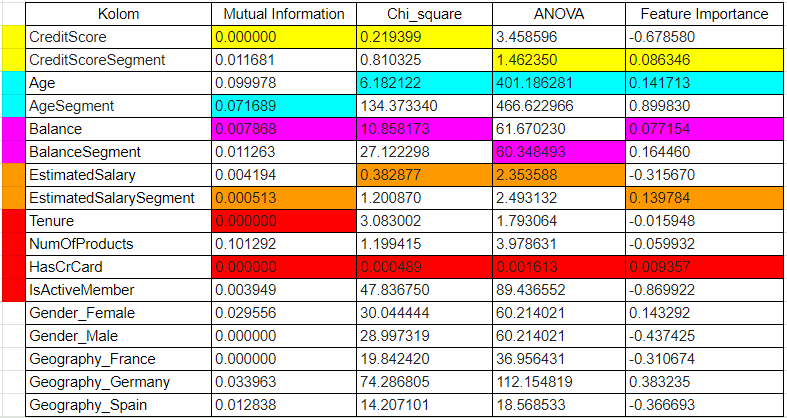

In [ ]:
from PIL import Image
img = Image.open('Rangkuman_Feature_Selection_Undersampling.png')
img

Conclusion: <br>
1. From the column analysis and segmentation results, the columns to be dropped are Segment CreditScore, Segment Age, Balance, and EstimatedSalary.
2. Tenure will be dropped because this column has relatively low feature values compared to all other features.
3. Features that have been dropped from the beginning are the RowNumber, CustomerId, and Surname features.

# **A. Modeling**

Copying Xtrain_under, Xtest, ytrain_under, and ytest to avoid duplication due to errors during modeling.

In [ ]:
Xtrain_under1 = Xtrain_under.copy()
Xeval1 = Xeval.copy()
ytrain_under1 = ytrain_under.copy()
yeval1 = yeval.copy()
Xtest1 = Xtest.copy()
ytest1 = ytest.copy()

In [ ]:
Xtrain_under1 = Xtrain_under1.drop(columns=['CreditScoreSegment', 'Age', 'Balance', 'EstimatedSalarySegment', 'HasCrCard'])
Xeval1 = Xeval1.drop(columns=['CreditScoreSegment', 'Age', 'Balance', 'EstimatedSalarySegment', 'HasCrCard'])
Xtest1 = Xtest1.drop(columns=['CreditScoreSegment', 'Age', 'Balance', 'EstimatedSalarySegment', 'HasCrCard'])

In [ ]:
Xtrain_under1.head()

CreditScore  Tenure  NumOfProducts  IsActiveMember  EstimatedSalary  \
0        0.394       6              1               1         0.185761   
1        0.352       1              1               1         0.631412   
2        0.814       5              1               1         0.971233   
3        0.768       9              1               1         0.063944   
4        0.786       6              2               0         0.221290   

   Gender_Female  Gender_Male  Geography_France  Geography_Germany  \
0              1            0                 1                  0   
1              0            1                 1                  0   
2              0            1                 0                  0   
3              1            0                 1                  0   
4              0            1                 1                  0   

   Geography_Spain  AgeSegment BalanceSegment  
0                0           1              3  
1                0           1              3  
2                1           2              2  
3                0           3              4  
4                0           2              1

### **Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(Xeval1)
    y_pred_train = model.predict(Xtrain_under1)
    y_pred_proba = model.predict_proba(Xeval1)
    y_pred_proba_train = model.predict_proba(Xtrain_under1)

    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain_under1, y_pred_train))
    print("Accuracy (Eval Set): %.2f" % accuracy_score(yeval1, y_pred))
    print("Precision (Train Set): %.2f" % precision_score(ytrain_under1, y_pred_train))
    print("Precision (Eval Set): %.2f" % precision_score(yeval1, y_pred))
    print("Recall (Train Set): %.2f" % recall_score(ytrain_under1, y_pred_train))
    print("Recall (Eval Set): %.2f" % recall_score(yeval1, y_pred))
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain_under1, y_pred_train))
    print("F1-Score (Eval Set): %.2f" % f1_score(yeval1, y_pred))

    print("AUC (Train-proba): %.2f" % roc_auc_score(ytrain_under1, y_pred_proba_train[:, 1]))
    print("AUC (Eval-proba): %.2f" % roc_auc_score(yeval1, y_pred_proba[:, 1]))

    score = cross_validate(model, X=Xtrain_under1, y=ytrain_under1, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (Crossval  Train): '+ str(score['train_score'].mean()))
    print('roc_auc (Crossval  Eval): '+ str(score['test_score'].mean()))

## **Logistic Regression**

### **B. Modeling**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(Xtrain_under1, ytrain_under1)

LogisticRegression()

In [ ]:
eval_classification(logreg)

Accuracy (Train Set): 0.70
Accuracy (Eval Set): 0.71
Precision (Train Set): 0.70
Precision (Eval Set): 0.38
Recall (Train Set): 0.70
Recall (Eval Set): 0.68
F1-Score (Train Set): 0.70
F1-Score (Eval Set): 0.49
AUC (Train-proba): 0.77
AUC (Eval-proba): 0.78
roc_auc (Crossval  Train): 0.7706490803159423
roc_auc (Crossval  Eval): 0.7665261335695969


### **C. Tuning Hyperparameter**

param value: 1e-06; train: 0.7247556715287304; test: 0.7472005719598943
param value: 0.0010213877551020407; train: 0.7584740242216014; test: 0.7716096449779526
param value: 0.0020417755102040817; train: 0.7616115349467418; test: 0.7736784360851932
param value: 0.0030621632653061222; train: 0.763752375351068; test: 0.7754296829691716
param value: 0.004082551020408163; train: 0.7654623489407004; test: 0.7765781662676764
param value: 0.005102938775510204; train: 0.7666051231274044; test: 0.7776353793702737
param value: 0.006123326530612244; train: 0.7673914783291673; test: 0.7782780736664567
param value: 0.007143714285714285; train: 0.7679516982480565; test: 0.7786450559125023
param value: 0.008164102040816325; train: 0.7682769422042885; test: 0.7787572421949722
param value: 0.009184489795918366; train: 0.7684956327041872; test: 0.7788808372519304
param value: 0.010204877551020407; train: 0.768599859665841; test: 0.7790785893430636
param value: 0.011225265306122448; train: 0.7686729115987

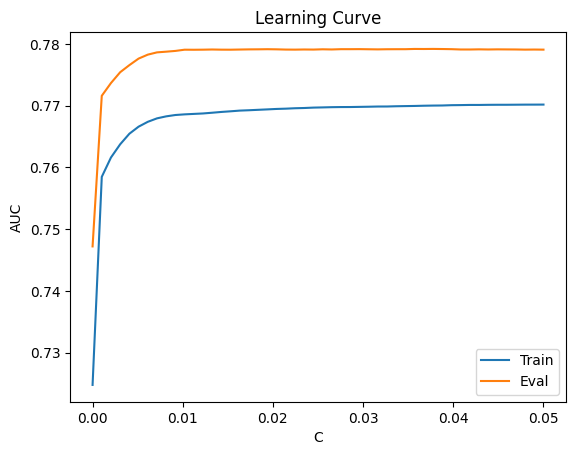

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

param_values = [float(x) for x in np.linspace(0.000001, 0.05, 50)]
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Eval')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

draw_learning_curve(param_values)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
C = [0.01, 0.02, 0.03]
hyperparameters = dict(penalty=penalty, C=C)

lr = LogisticRegression()
lr_tuned = RandomizedSearchCV(lr, hyperparameters, scoring='roc_auc', cv=5)
lr_tuned.fit(Xtrain_under1, ytrain_under1)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.01, 0.02, 0.03],
                                        'penalty': ['l1', 'l2']},
                   scoring='roc_auc')

In [ ]:
eval_classification(lr_tuned)

Accuracy (Train Set): 0.70
Accuracy (Eval Set): 0.72
Precision (Train Set): 0.70
Precision (Eval Set): 0.39
Recall (Train Set): 0.69
Recall (Eval Set): 0.68
F1-Score (Train Set): 0.70
F1-Score (Eval Set): 0.50
AUC (Train-proba): 0.77
AUC (Eval-proba): 0.78
roc_auc (Crossval  Train): 0.770012439897976
roc_auc (Crossval  Eval): 0.7662550833796693


### **D. Model Evaluation** ###
ROC_AUC scores for cross-validation on train and test sets:<br>

Before hyperparameter tuning: above 0.7 and not significantly different, indicating that the model is **adequately fit**.
After hyperparameter tuning: above 0.7 and not significantly different, indicating that the model is **adequately fit**.

## **Decision Tree**

### **B. Modeling**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(Xtrain_under1, ytrain_under1)

DecisionTreeClassifier()

In [ ]:
eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Eval Set): 0.69
Precision (Train Set): 1.00
Precision (Eval Set): 0.36
Recall (Train Set): 1.00
Recall (Eval Set): 0.67
F1-Score (Train Set): 1.00
F1-Score (Eval Set): 0.47
AUC (Train-proba): 1.00
AUC (Eval-proba): 0.68
roc_auc (Crossval  Train): 1.0
roc_auc (Crossval  Eval): 0.6845081377260802


### **C. Tuning Hyperparamener**

param value: 1; train: 0.6828103683492497; test: 0.7003171639307793
param value: 2; train: 0.7339355542361745; test: 0.7440327355769322
param value: 3; train: 0.778159658954492; test: 0.7943787066632947
param value: 4; train: 0.8126906562390074; test: 0.8210590765357637
param value: 5; train: 0.8454772478126297; test: 0.8516517053265666
param value: 6; train: 0.8652910724023757; test: 0.8410928845374978
param value: 7; train: 0.8850232370288615; test: 0.8372756987399008
param value: 8; train: 0.9079508420980144; test: 0.8119729383869133
param value: 9; train: 0.9308335458198475; test: 0.7704782748411805
param value: 10; train: 0.9546349822907224; test: 0.7459341979916755


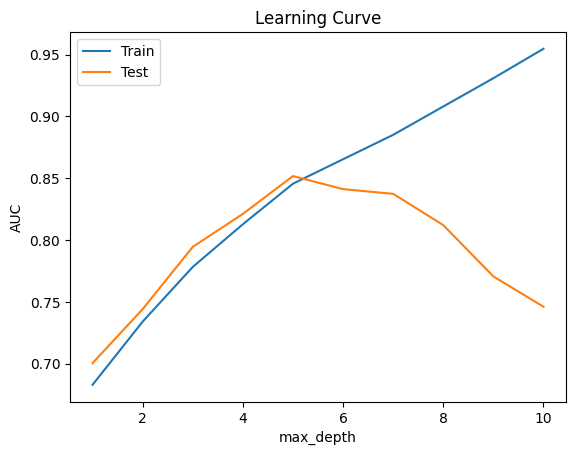

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(max_depth=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 10, 10)]
draw_learning_curve(param_values)

param value: 2; train: 1.0; test: 0.6883712263101551
param value: 4; train: 0.9980492342110112; test: 0.7010463747668332
param value: 6; train: 0.9919742913031906; test: 0.7009788728511098
param value: 8; train: 0.9837961972048562; test: 0.7183164071487381
param value: 10; train: 0.9768839488617856; test: 0.7201275500987809
param value: 12; train: 0.9716805108610078; test: 0.7278104089855508
param value: 14; train: 0.9648180495040843; test: 0.7305447119379516
param value: 16; train: 0.9596169379979862; test: 0.7446868386476039
param value: 18; train: 0.9543085750871505; test: 0.7433472583764174
param value: 20; train: 0.9489615923646306; test: 0.7499291705250508
param value: 22; train: 0.9441671521285565; test: 0.7600430491090698
param value: 24; train: 0.9399778331586912; test: 0.7638431217449342
param value: 26; train: 0.9344942851984687; test: 0.7685986792442068
param value: 28; train: 0.9315777914679065; test: 0.7727971082559597
param value: 30; train: 0.925594512450469; test: 0.78

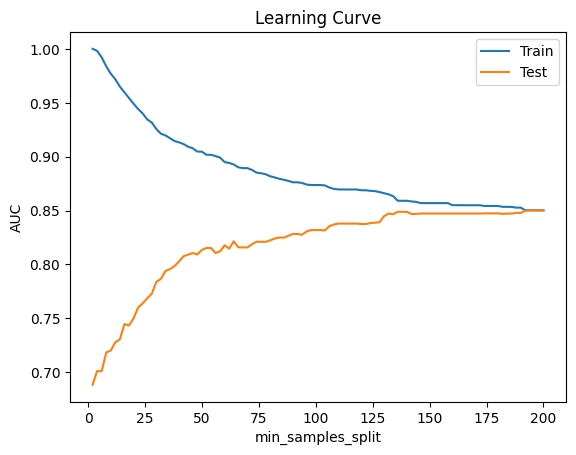

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_split=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_split')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(2, 200, 100)]  # Contoh nilai min_samples_split dari 2 hingga 200
draw_learning_curve(param_values)


param value: 1; train: 1.0; test: 0.6877066651962025
param value: 4; train: 0.9685823178959554; test: 0.7588993194666018
param value: 7; train: 0.9401099780565021; test: 0.7860911827286365
param value: 10; train: 0.9215354771826709; test: 0.7934564973921442
param value: 13; train: 0.9093092823415332; test: 0.8062913686916607
param value: 16; train: 0.8984231484359442; test: 0.8193620213306054
param value: 19; train: 0.8903911582034995; test: 0.8277170471809867
param value: 22; train: 0.8844516172860416; test: 0.8337760571655659
param value: 25; train: 0.8801234065837937; test: 0.8372024924369332
param value: 28; train: 0.8767199775167553; test: 0.8442264945969946
param value: 31; train: 0.8712338704123851; test: 0.8473097159025006
param value: 34; train: 0.8668251629942172; test: 0.8444033306015657
param value: 37; train: 0.8648497363616229; test: 0.8460357360846227
param value: 40; train: 0.8638435274126214; test: 0.8438680689318154
param value: 43; train: 0.8606311035587924; test: 0.

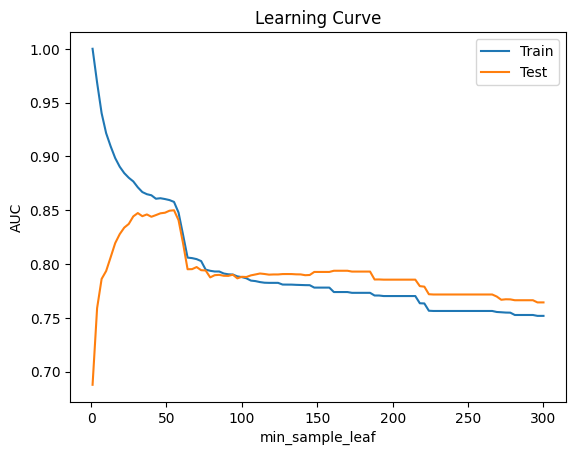

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = DecisionTreeClassifier(min_samples_leaf=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_sample_leaf')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 300, 100)]
draw_learning_curve(param_values)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(4, 6, num = 3)] # Maximum number of levels in tree
min_samples_split = [int(x) for x in np.linspace(150, 175, num = 25)] # Minimum number of samples required to split a node
min_samples_leaf = [int(x) for x in np.linspace(25, 50, num = 25)] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=123)
dt_tuned = GridSearchCV(dt, hyperparameters, cv=5, scoring='precision')
dt_tuned.fit(Xtrain_under1, ytrain_under1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [25, 26, 27, 28, 29, 30, 31, 32,
                                              33, 34, 35, 36, 37, 38, 39, 40,
                                              41, 42, 43, 44, 45, 46, 47, 48,
                                              50],
                         'min_samples_split': [150, 151, 152, 153, 154, 155,
                                               156, 157, 158, 159, 160, 161,
                                               162, 163, 164, 165, 166, 167,
                                               168, 169, 170, 171, 172, 173,
                                               175],
                         'splitter': ['best', 'random']},
             scoring='precision')

In [ ]:
eval_classification(dt_tuned)

Accuracy (Train Set): 0.69
Accuracy (Eval Set): 0.67
Precision (Train Set): 0.67
Precision (Eval Set): 0.36
Recall (Train Set): 0.75
Recall (Eval Set): 0.75
F1-Score (Train Set): 0.71
F1-Score (Eval Set): 0.48
AUC (Train-proba): 0.76
AUC (Eval-proba): 0.77
roc_auc (Crossval  Train): 0.7605286072471441
roc_auc (Crossval  Eval): 0.7362215638389917


### **D. Model Evaluation**

ROC_AUC scores for cross-validation on train and test sets:<br>
- Before hyperparameter tuning: there is a significant difference, indicating **underfitting**.
- After hyperparameter tuning: above 0.7 and not significantly different, indicating that the model is **adequately fit**.

## **K-Nearest Neighbor**

### **B. Modeling**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(Xtrain_under1, ytrain_under1)

KNeighborsClassifier()

In [ ]:
eval_classification(knn)

Accuracy (Train Set): 0.81
Accuracy (Eval Set): 0.74
Precision (Train Set): 0.83
Precision (Eval Set): 0.42
Recall (Train Set): 0.79
Recall (Eval Set): 0.67
F1-Score (Train Set): 0.81
F1-Score (Eval Set): 0.52
AUC (Train-proba): 0.90
AUC (Eval-proba): 0.78
roc_auc (Crossval  Train): 0.8927442605411443
roc_auc (Crossval  Eval): 0.78027218412205


### **C. Tuning Hyperparameter**

param value: 1; train: 1.0; test: 0.6851815231094235
param value: 5; train: 0.8965142595511912; test: 0.7811331194821938
param value: 9; train: 0.8718966887466522; test: 0.8030797986731596
param value: 13; train: 0.8552099056559878; test: 0.8128352515919992
param value: 17; train: 0.844291666123818; test: 0.8162160517654128
param value: 21; train: 0.8360644829877402; test: 0.8139894392777487
param value: 25; train: 0.8303652689707028; test: 0.8155106092095431
param value: 29; train: 0.8231670944314884; test: 0.8129807134667273
param value: 33; train: 0.8184259309235811; test: 0.8116953248743609
param value: 37; train: 0.8148126520364273; test: 0.8091283506144576
param value: 41; train: 0.8126238858416979; test: 0.8105297284141233
param value: 45; train: 0.8110970073833635; test: 0.808725240582532
param value: 49; train: 0.8078096704008457; test: 0.8062571423681955
param value: 53; train: 0.8049271434926083; test: 0.806489120782794
param value: 57; train: 0.8020390329971392; test: 0.808

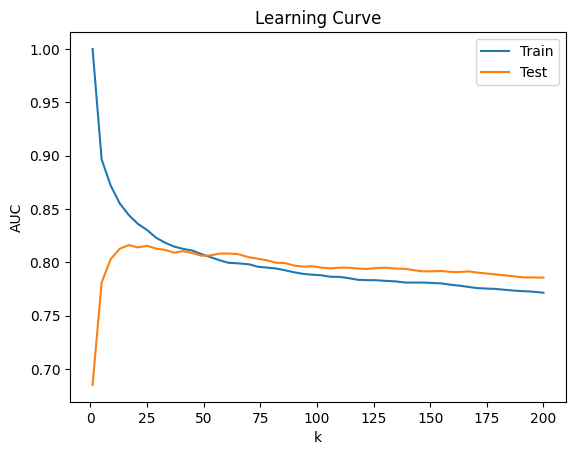

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 200, 50)]
draw_learning_curve(param_values)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(25,50))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(Xtrain_under1, ytrain_under1)
knn_tuned = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=123, cv=5)
knn_tuned.fit(Xtrain_under1, ytrain_under1)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [25, 26, 27, 28, 29, 30,
                                                        31, 32, 33, 34, 35, 36,
                                                        37, 38, 39, 40, 41, 42,
                                                        43, 44, 45, 46, 47, 48,
                                                        49],
                                        'p': [1, 2]},
                   random_state=123, scoring='roc_auc')

In [ ]:
eval_classification(knn_tuned)

Accuracy (Train Set): 0.75
Accuracy (Eval Set): 0.76
Precision (Train Set): 0.76
Precision (Eval Set): 0.45
Recall (Train Set): 0.74
Recall (Eval Set): 0.72
F1-Score (Train Set): 0.75
F1-Score (Eval Set): 0.55
AUC (Train-proba): 0.83
AUC (Eval-proba): 0.82
roc_auc (Crossval  Train): 0.8273389069972872
roc_auc (Crossval  Eval): 0.7975476875510655


### **D. Model Evaluation**

ROC_AUC scores for cross-validation on train and test sets:<br>
- Before hyperparameter tuning: there is a significant difference, indicating **underfitting**.
- After hyperparameter tuning: above 0.7 but below 0.9 and not significantly different, indicating that the model is **adequately fit**.

## **Random Forest**

### **B. Modeling**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=123)
rf.fit(Xtrain_under1, ytrain_under1)

RandomForestClassifier(random_state=123)

In [ ]:
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Eval Set): 0.78
Precision (Train Set): 1.00
Precision (Eval Set): 0.47
Recall (Train Set): 1.00
Recall (Eval Set): 0.75
F1-Score (Train Set): 1.00
F1-Score (Eval Set): 0.58
AUC (Train-proba): 1.00
AUC (Eval-proba): 0.84
roc_auc (Crossval  Train): 1.0
roc_auc (Crossval  Eval): 0.8269850012714144


### **C. Tuning Hyperparameter**

param value: 1; train: 0.7870363994051619; test: 0.7962174208183515
param value: 2; train: 0.8054292010445031; test: 0.8111847822160023
param value: 3; train: 0.8253642360070651; test: 0.8291469469168737
param value: 4; train: 0.8364209019726814; test: 0.8392189933277684
param value: 5; train: 0.8548669803401894; test: 0.848339357800084
param value: 6; train: 0.8745288848273463; test: 0.8522810893858467
param value: 7; train: 0.8973241123492199; test: 0.8497578487614825
param value: 8; train: 0.9244010206797459; test: 0.8570423512723636


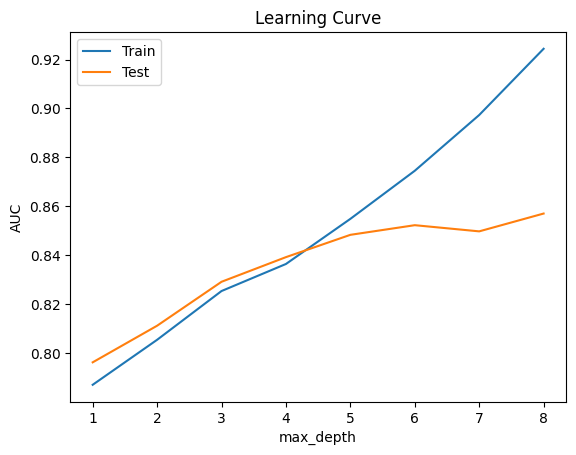

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(max_depth=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('max_depth')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 8, 8)]
draw_learning_curve(param_values)

param value: 2; train: 1.0; test: 0.8375285932410618
param value: 5; train: 0.9972521771337213; test: 0.8441694507245523
param value: 8; train: 0.9858423492757157; test: 0.8464588114719029
param value: 11; train: 0.9703330051424839; test: 0.8508179140577017
param value: 14; train: 0.9577466689249174; test: 0.8540437450443136
param value: 17; train: 0.9464417659769695; test: 0.8533554156501765
param value: 20; train: 0.9373684367258588; test: 0.8535569706661394
param value: 23; train: 0.9293392382870299; test: 0.8539277558370142
param value: 26; train: 0.9219912374904381; test: 0.8536121130761669
param value: 29; train: 0.9169957881140318; test: 0.8535854926023605
param value: 32; train: 0.9127248091809064; test: 0.8509671788572591
param value: 35; train: 0.9067508361421879; test: 0.8531443533221399
param value: 38; train: 0.9072021761100637; test: 0.8528211047116336
param value: 41; train: 0.9003557675664307; test: 0.8540361391946546
param value: 44; train: 0.8965396183432007; test: 0.

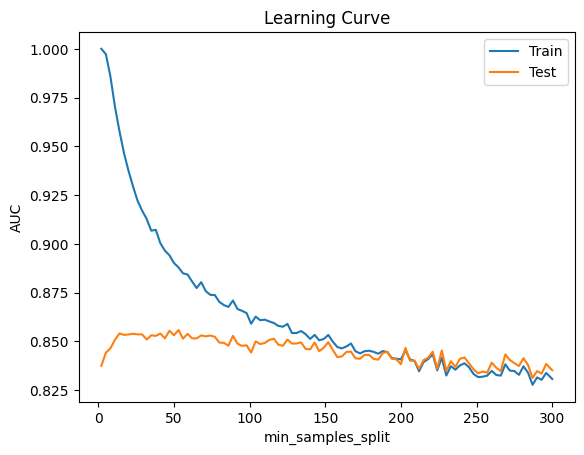

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = RandomForestClassifier(min_samples_split=i)
        model.fit(Xtrain_under1, ytrain_under1)

        # eval on train
        y_pred_train_proba = model.predict_proba(Xtrain_under1)
        train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(Xeval1)
        test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('min_samples_split')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(2, 300, 100)]  # Contoh nilai min_samples_split dari 2 hingga 200
draw_learning_curve(param_values)


param value: 1; train: 1.0; test: 0.8358676658217835
param value: 3; train: 0.9754838643634989; test: 0.8517524828345481
param value: 5; train: 0.9464143133397483; test: 0.8507884413902732
param value: 7; train: 0.9260058367098526; test: 0.852552998511155
param value: 9; train: 0.9113577609070724; test: 0.8491893114994743
param value: 11; train: 0.9020345661273541; test: 0.850664846333315
param value: 13; train: 0.8936107941908359; test: 0.8492292422101838
param value: 15; train: 0.8864789247499949; test: 0.8496817902648928
param value: 17; train: 0.879000407601868; test: 0.8468714288159023
param value: 19; train: 0.8768821341959356; test: 0.8476595849868134
param value: 21; train: 0.8739079433973149; test: 0.8476881069230344
param value: 23; train: 0.8688729436113525; test: 0.8484268250711623
param value: 25; train: 0.8669763851484025; test: 0.8487643346497791
param value: 27; train: 0.8607095064295007; test: 0.8410843279566314
param value: 29; train: 0.8587808423399697; test: 0.84280

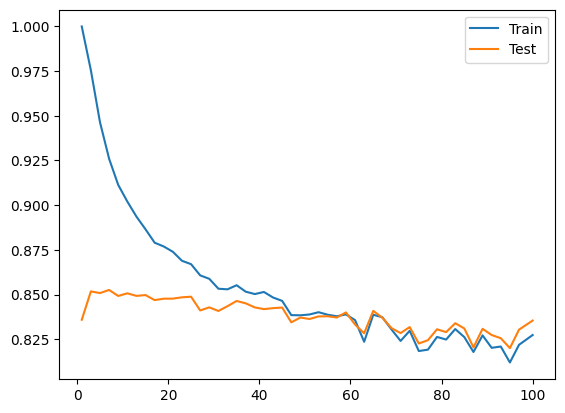

In [ ]:
param_values = [int(x) for x in np.linspace(1, 100, 50)] # min_samples_leaf

train_scores = []
test_scores = []

for c in param_values:
    model = RandomForestClassifier(n_estimators=75, min_samples_leaf=c) #n_estimator yaitu jumlah desicion tree yang diguanakan dalam random forest
    model.fit(Xtrain_under1, ytrain_under1)

    # eval on train
    y_pred_train_proba = model.predict_proba(Xtrain_under1)
    train_auc = roc_auc_score(ytrain_under1, y_pred_train_proba[:,1])
    train_scores.append(train_auc)

    # eval on test
    y_pred_proba = model.predict_proba(Xeval1)
    test_auc = roc_auc_score(yeval1, y_pred_proba[:,1])
    test_scores.append(test_auc)

    print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

plt.plot(param_values, train_scores, label='Train')
plt.plot(param_values, test_scores, label='Test')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(120, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(4, 5)]
min_samples_split = [int(x) for x in np.linspace(150, 200, 50)]
min_samples_leaf = [int(x) for x in np.linspace(40, 50, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=123)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=123, cv=5)
rf_tuned.fit(Xtrain_under1, ytrain_under1)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [4, 4, 4, 4, 4, 4, 4, 4, 4,
                                                      4, 4, 4, 4, 4, 4, 4, 4, 4,
                                                      4, 4, 4, 4, 4, 4, 4, 4, 4,
                                                      4, 4, 4, ...],
                                        'min_samples_leaf': [40, 41, 42, 43, 44,
                                                             45, 46, 47, 48,
                                                             50],
                                        'min_samples_split': [150, 151, 152,
                                                              153, 154, 155,
                                                              156, 157, 158,
                                                              159, 160, 161,
                                                              162, 163, 164,
                                                              165, 166, 167,
                                                              168, 169, 170,
                                                              171, 172, 173,
                                                              174, 175, 176,
                                                              177, 178, 179, ...],
                                        'n_estimators': [120, 121, 123, 124,
                                                         126, 128, 129, 131,
                                                         133, 134, 136, 137,
                                                         139, 141, 142, 144,
                                                         146, 147, 149, 151,
                                                         152, 154, 155, 157,
                                                         159, 160, 162, 164,
                                                         165, 167, ...]},
                   random_state=123, scoring='roc_auc')

In [ ]:
eval_classification(rf_tuned)

Accuracy (Train Set): 0.76
Accuracy (Eval Set): 0.75
Precision (Train Set): 0.74
Precision (Eval Set): 0.43
Recall (Train Set): 0.78
Recall (Eval Set): 0.75
F1-Score (Train Set): 0.76
F1-Score (Eval Set): 0.55
AUC (Train-proba): 0.83
AUC (Eval-proba): 0.84


### **D. Model Evaluation**

ROC_AUC scores for cross-validation on train and test sets:<br>
- Before hyperparameter tuning: there is a significant difference, indicating underfitting.
- After hyperparameter tuning: above 0.7 but below 0.9 and not significantly different, indicating that the model is **adequately fit**.

## **AdaBoost**

### **B. Modeling**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(Xtrain_under1, ytrain_under1)

AdaBoostClassifier()

In [ ]:
eval_classification(ada)

Accuracy (Train Set): 0.76
Accuracy (Eval Set): 0.78
Precision (Train Set): 0.77
Precision (Eval Set): 0.47
Recall (Train Set): 0.75
Recall (Eval Set): 0.75
F1-Score (Train Set): 0.76
F1-Score (Eval Set): 0.58
AUC (Train-proba): 0.84
AUC (Eval-proba): 0.84
roc_auc (Crossval  Train): 0.8482982610815475
roc_auc (Crossval  Eval): 0.8230709029293088


### **C. Tuning Hyperparameter**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 100)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.01, stop = 3, num = 50)],
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ada = AdaBoostClassifier(random_state=123)
ada_tuned = RandomizedSearchCV(ada, hyperparameters, random_state=123, cv=5, scoring='recall')
ada_tuned.fit(Xtrain_under1,ytrain_under1)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=123),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.01,
                                                          0.07102040816326531,
                                                          0.1320408163265306,
                                                          0.19306122448979593,
                                                          0.2540816326530612,
                                                          0.31510204081632653,
                                                          0.37612244897959185,
                                                          0.43714285714285717,
                                                          0.4981632653061225,
                                                          0.5591836734693878,
                                                          0.6202040816326531,
                                                          0.6812244...
                                                          1.1083673469387756,
                                                          1.1693877551020408,
                                                          1.230408163265306,
                                                          1.2914285714285716,
                                                          1.3524489795918369,
                                                          1.4134693877551021,
                                                          1.4744897959183674,
                                                          1.5355102040816326,
                                                          1.5965306122448981,
                                                          1.6575510204081634,
                                                          1.7185714285714286,
                                                          1.779591836734694, ...],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   random_state=123, scoring='recall')

In [ ]:
eval_classification(ada_tuned)

Accuracy (Train Set): 0.76
Accuracy (Eval Set): 0.78
Precision (Train Set): 0.77
Precision (Eval Set): 0.47
Recall (Train Set): 0.74
Recall (Eval Set): 0.75
F1-Score (Train Set): 0.75
F1-Score (Eval Set): 0.58
AUC (Train-proba): 0.84
AUC (Eval-proba): 0.84
roc_auc (Crossval  Train): 0.8474136444882687
roc_auc (Crossval  Eval): 0.8225515525083871


### **D. Model Evaluation**

ROC_AUC scores for cross-validation on train and test sets:<br>
- Before hyperparameter tuning: above 0.7 but below 0.9 and not significantly different, indicating that the model is **adequately fit**.
- After hyperparameter tuning: above 0.7 but below 0.9 and not significantly different, indicating that the model is **adequately fit**.

## **XGBoost**

### **B. Modeling**

In [ ]:
# Copy the dataset to change the column type from object to integer
Xtrain_under1_xg = Xtrain_under1.copy()
Xeval1_xg = Xeval1.copy()
Xtest1_xg = Xtest1.copy()
ytrain_under1_xg = ytrain_under1.copy()
yeval1_xg = yeval1.copy()
ytest1_xg = ytest.copy()

In [ ]:
Xtrain_under1_xg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2932 entries, 0 to 2931
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2932 non-null   float64
 1   Tenure             2932 non-null   int64  
 2   NumOfProducts      2932 non-null   int64  
 3   IsActiveMember     2932 non-null   int64  
 4   EstimatedSalary    2932 non-null   float64
 5   Gender_Female      2932 non-null   int64  
 6   Gender_Male        2932 non-null   int64  
 7   Geography_France   2932 non-null   int64  
 8   Geography_Germany  2932 non-null   int64  
 9   Geography_Spain    2932 non-null   int64  
 10  AgeSegment         2932 non-null   int64  
 11  BalanceSegment     2932 non-null   object 
dtypes: float64(2), int64(9), object(1)
memory usage: 275.0+ KB


In [ ]:
# To change the columns that are of object type in `Xtrain_under1_xg` to integer type
Xtrain_under1_xg['BalanceSegment'] = Xtrain_under1_xg['BalanceSegment'].astype(float)

#To change the columns that are of object type in `Xeval1_xg` to integer type.
Xeval1_xg['BalanceSegment'] = Xeval1_xg['BalanceSegment'].astype(float)

#To change the columns that are of object type in `Xtest1_xg` to integer type.
Xtest1_xg['BalanceSegment'] = Xtest1_xg['BalanceSegment'].astype(float)

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(Xtrain_under1_xg, ytrain_under1_xg)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification_xg(model):
    y_pred_xg = model.predict(Xeval1_xg)
    y_pred_train_xg = model.predict(Xtrain_under1_xg)
    y_pred_proba_xg = model.predict_proba(Xeval1_xg)
    y_pred_proba_train_xg = model.predict_proba(Xtrain_under1_xg)

    print("Accuracy (Train Set): %.2f" % accuracy_score(ytrain_under1_xg, y_pred_train_xg))
    print("Accuracy (Eval Set): %.2f" % accuracy_score(yeval1_xg, y_pred_xg))
    print("Precision (Train Set): %.2f" % precision_score(ytrain_under1_xg, y_pred_train_xg))
    print("Precision (Eval Set): %.2f" % precision_score(yeval1_xg, y_pred_xg))
    print("Recall (Train Set): %.2f" % recall_score(ytrain_under1_xg, y_pred_train_xg))
    print("Recall (Eval Set): %.2f" % recall_score(yeval1_xg, y_pred_xg))
    print("F1-Score (Train Set): %.2f" % f1_score(ytrain_under1_xg, y_pred_train_xg))
    print("F1-Score (Eval Set): %.2f" % f1_score(yeval1_xg, y_pred_xg))

    print("AUC (train-proba): %.2f" % roc_auc_score(ytrain_under1_xg, y_pred_proba_train_xg[:, 1]))
    print("AUC (Eval-proba): %.2f" % roc_auc_score(yeval1_xg, y_pred_proba_xg[:, 1]))

    score = cross_validate(model, Xtrain_under1_xg, ytrain_under1_xg, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval  train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval  Eval): '+ str(score['test_score'].mean()))

In [ ]:
eval_classification_xg(xg)

Accuracy (Train Set): 0.98
Accuracy (Eval Set): 0.75
Precision (Train Set): 0.99
Precision (Eval Set): 0.43
Recall (Train Set): 0.98
Recall (Eval Set): 0.75
F1-Score (Train Set): 0.98
F1-Score (Eval Set): 0.55
AUC (train-proba): 1.00
AUC (Eval-proba): 0.83
roc_auc (crossval  train): 0.9998009383406428
roc_auc (crossval  Eval): 0.8182779319138342


### **C. Tuning Hyperparameter**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the hyperparameters dictionary
hyperparameters = {
    'max_depth': [1],  # Narrowing down the range
    'min_child_weight': [1],  # Narrowing down the range
    'gamma': [0, 0.1, 0.2],  # Narrowing down the range
    'tree_method': ['auto'],  # Limiting the options
    'colsample_bytree': [0.1, 0.2],  # Narrowing down the range
    'eta': [0.01, 0.1, 0.2],  # Narrowing down the range
    'lambda': [0, 0.1, 0.2],  # Narrowing down the range
    'alpha': [0, 0.1, 0.2]  # Narrowing down the range
}

# Initialize the XGBoost classifier
xg = XGBClassifier(random_state=123)

# Perform RandomizedSearchCV with more conservative hyperparameters
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=123, scoring='recall', n_iter=20)
xg_tuned.fit(Xtrain_under1_xg, ytrain_under1_xg)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=123, ...),
                   n_iter=20,
                   param_distributions={'alpha': [0, 0.1, 0.2],
                                        'colsample_bytree': [0.1, 0.2],
                                        'eta': [0.01, 0.1, 0.2],
                                        'gamma': [0, 0.1, 0.2],
                                        'lambda': [0, 0.1, 0.2],
                                        'max_depth': [1],
                                        'min_child_weight': [1],
                                        'tree_method': ['auto']},
                   random_state=123, scoring='recall')

In [ ]:
eval_classification_xg(xg_tuned)

Accuracy (Train Set): 0.76
Accuracy (Eval Set): 0.78
Precision (Train Set): 0.76
Precision (Eval Set): 0.47
Recall (Train Set): 0.75
Recall (Eval Set): 0.74
F1-Score (Train Set): 0.76
F1-Score (Eval Set): 0.57
AUC (train-proba): 0.83
AUC (Eval-proba): 0.84
roc_auc (crossval  train): 0.8271019114886714
roc_auc (crossval  Eval): 0.8207227046254209


### **D. Model Evaluation**

ROC_AUC scores for cross-validation on train and test sets:<br>
- Before hyperparameter tuning: there is a significant difference, indicating **underfitting**.
- After hyperparameter tuning: above 0.7 but below 0.9 and not significantly different, indicating that the model is **adequately fit**.

## **Confusion Metrics**

In [ ]:
from sklearn.metrics import confusion_matrix


def confusion(model):
    y_pred_proba = model.predict_proba(Xtest1)
    y_predict = model.predict(Xtest1)
    print('Accuracy: %.2f%%' % (accuracy_score(ytest1, y_predict) * 100))
    print('Precision: %.2f%%' % (precision_score(ytest1, y_predict) * 100))
    print('Recall: %.2f%%' % (recall_score(ytest1, y_predict) * 100))
    print('F1_Score: %.2f%%' % (f1_score(ytest1, y_predict) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(ytest1, y_pred_proba[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(ytest1, y_predict)

    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model.__class__.__name__}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])
    plt.show()

Accuracy: 76.80%
Precision: 45.88%
Recall: 76.47%
F1_Score: 57.35%
ROC_AUC: 83.77%


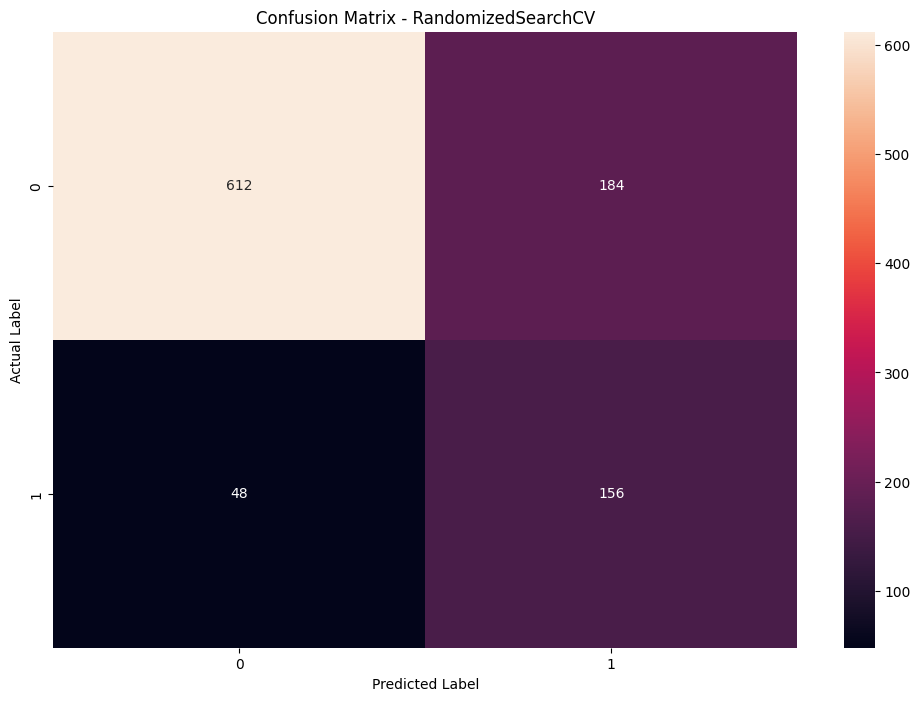

In [ ]:
confusion(rf_tuned)

Accuracy: 80.30%
Precision: 100.00%
Recall: 3.43%
F1_Score: 6.64%
ROC_AUC: 84.50%


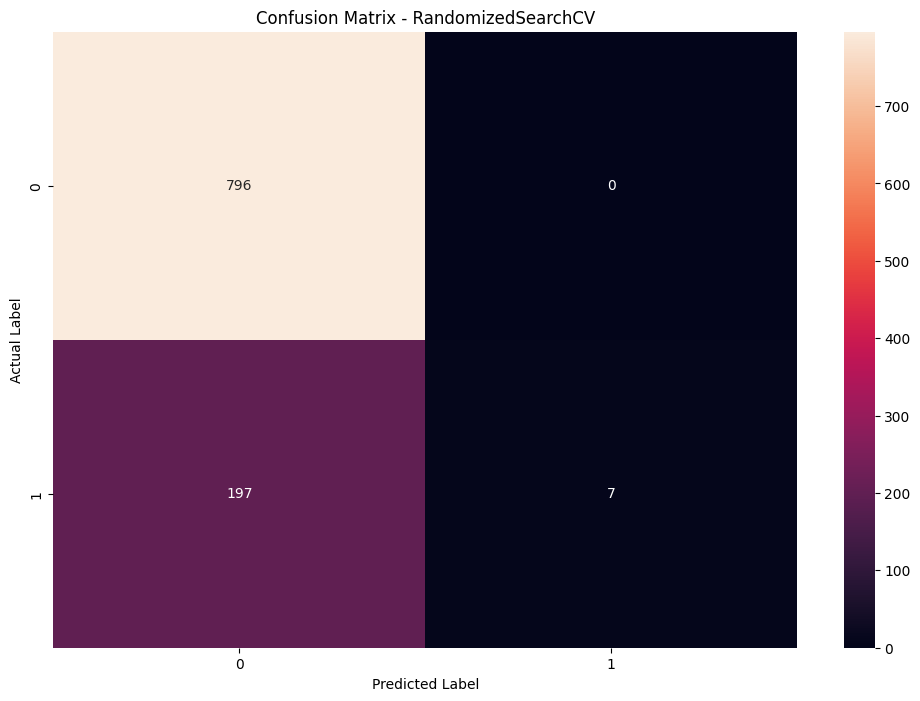

In [ ]:
confusion(ada_tuned)

## **Confusion Metrics XGBoost**

In [ ]:
def confusion_xg(model):
    y_pred_proba_xg = model.predict_proba(Xtest1_xg)
    y_predict_xg = model.predict(Xtest1_xg)
    print('Accuracy: %.2f%%' % (accuracy_score(ytest1_xg, y_predict_xg) * 100))
    print('Precision: %.2f%%' % (precision_score(ytest1_xg, y_predict_xg) * 100))
    print('Recall: %.2f%%' % (recall_score(ytest1_xg, y_predict_xg) * 100))
    print('F1_Score: %.2f%%' % (f1_score(ytest1_xg, y_predict_xg) * 100))
    print('ROC_AUC: %.2f%%' % (roc_auc_score(ytest1_xg, y_pred_proba_xg[:,1]) * 100))
    confusion_matrix_model = confusion_matrix(ytest1_xg, y_predict_xg)

    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    sns.heatmap(confusion_matrix_model, annot=True, fmt='g', ax = ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('Actual Label')
    ax.set_title(f'Confusion Matrix - {model.__class__.__name__}')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])
    plt.show()

Accuracy: 78.30%
Precision: 47.94%
Recall: 74.02%
F1_Score: 58.19%
ROC_AUC: 84.15%


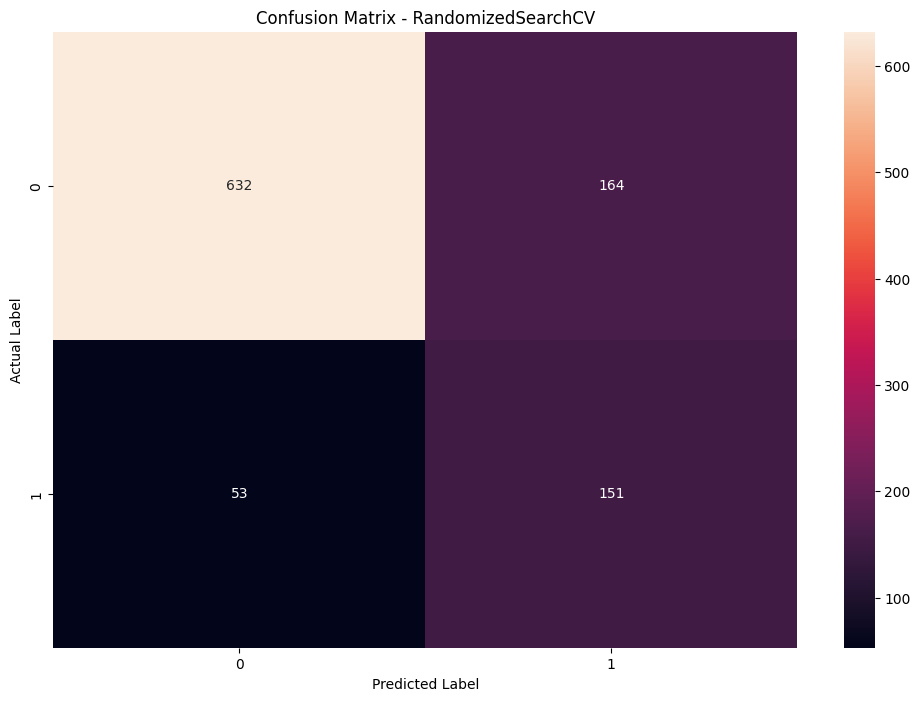

In [ ]:
confusion_xg(xg_tuned)

## **Feature Importance**

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 9.6 MB/s eta 0:00:00


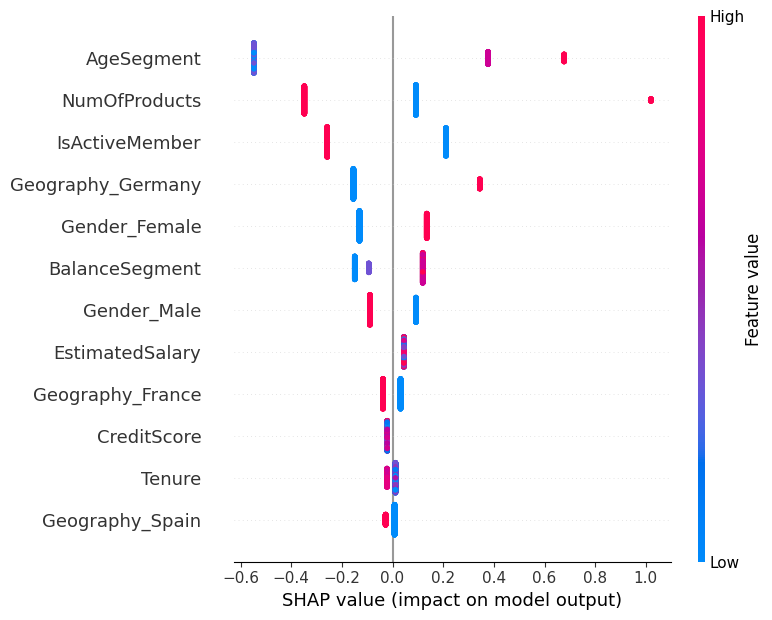

In [ ]:
import shap
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Define hyperparameters
hyperparameters = {
    'max_depth': 1,
    'min_child_weight': 1,
    'gamma': 0.1,
    'tree_method': 'auto',
    'colsample_bytree': 0.2,
    'eta': 0.1,
    'lambda': 0.1,
    'alpha': 0.1
}

# Initialize XGBoost classifier with specified hyperparameters
model_xg_tuned = xgb.XGBClassifier(random_state=123, **hyperparameters)

# Fit the model to the training data
model_xg_tuned.fit(Xtrain_under1_xg, ytrain_under1_xg)

# Create the explainer object
explainer = shap.TreeExplainer(model_xg_tuned)

# Calculate SHAP values for the test data
shap_values = explainer.shap_values(Xtest1_xg)

# Display summary plot of SHAP values
shap.summary_plot(shap_values, Xtest1_xg)

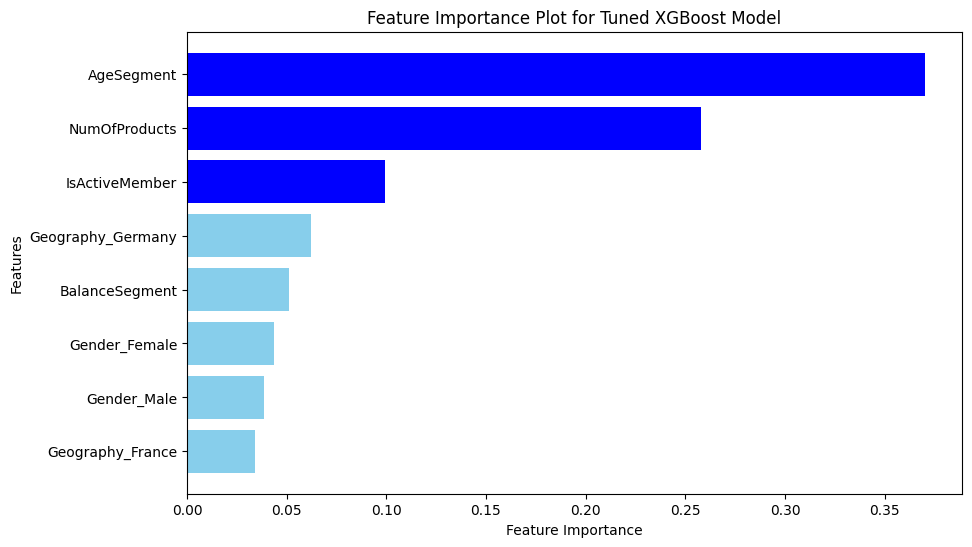

In [ ]:
import xgboost as xgb

# Define hyperparameters
hyperparameters = {
    'max_depth': 1,
    'min_child_weight': 1,
    'gamma': 0.1,
    'tree_method': 'auto',
    'colsample_bytree': 0.2,
    'eta': 0.1,
    'lambda': 0.1,
    'alpha': 0.1
}

# Initialize XGBoost classifier with specified hyperparameters
xgboost_clf_tuned = xgb.XGBClassifier(n_estimators=40, random_state=123, **hyperparameters)

# Fit the tuned XGBoost model to the training data
xgboost_clf_tuned.fit(Xtrain_under1_xg, ytrain_under1_xg)

# Extract feature importances from the tuned model
feature_importance_tuned = xgboost_clf_tuned.feature_importances_

# Sort the indices of feature importances
sorted_idx_tuned = np.argsort(feature_importance_tuned)
sorted_features_tuned = Xtest1_xg.columns[sorted_idx_tuned]
sorted_importance_tuned = feature_importance_tuned[sorted_idx_tuned]

# Select top features and their importances
top_features_tuned = sorted_features_tuned[-8:]
top_importance_tuned = sorted_importance_tuned[-8:]

# Set colors for top 3 features
colors = ['blue' if feature in top_features_tuned[-3:] else 'skyblue' for feature in top_features_tuned]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features_tuned, top_importance_tuned, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot for Tuned XGBoost Model')
plt.show()